In [46]:
import pandas as pd

# Load data
df = pd.read_csv('h.pylori.csv')

# Clean up data
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Encode job categories
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['job_encoded'] = label_encoder.fit_transform(df['job'])
df = df.drop(columns=['job'])
df.columns


Index(['case no', 'age', 'sex', 'education', 'epigastric pain ', 'fullness',
       ' bloating', 'reflux', 'halitosis', ' nausea', 'vomit', ' diarrhea',
       ' constipation', 'months', 'Hematochezia', 'loss of appetite',
       'weight loss', 'nightly perspirant',
       'Treatment of previous infection and use of antibiotics', ' ppi taking',
       ' nsaid taking', 'alchohlic', 'smoker', 'Gastrointestinal bleeding',
       'malignant stomach', 'stomach ulcer',
       'Gastrointestinal bleeding fam hist', 'malignant stomach fam hist',
       'stomach ulcer.1', 'Revisit', 'test result ', 'job_encoded'],
      dtype='object')

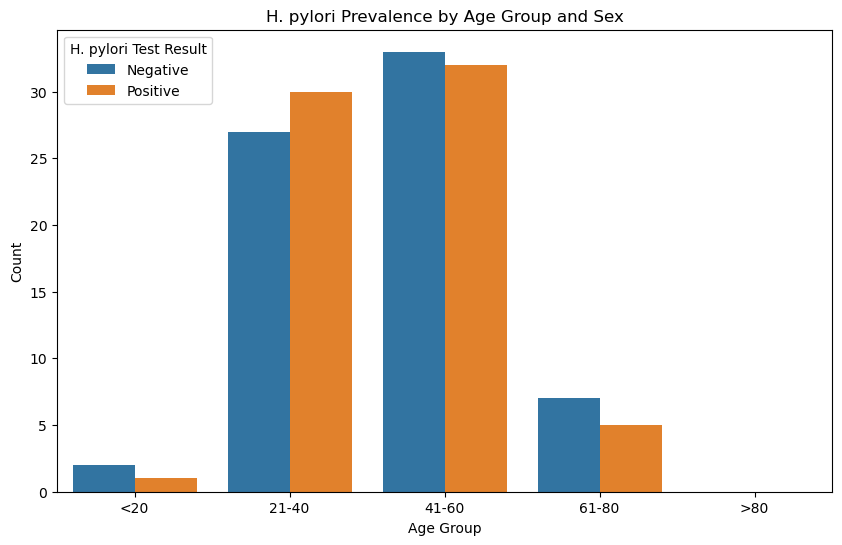

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Create age bins for better visualization
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['<20', '21-40', '41-60', '61-80', '>80'])

# Plot H. pylori prevalence by age group and sex
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='h_pylori_positive')
plt.title('H. pylori Prevalence by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.show()


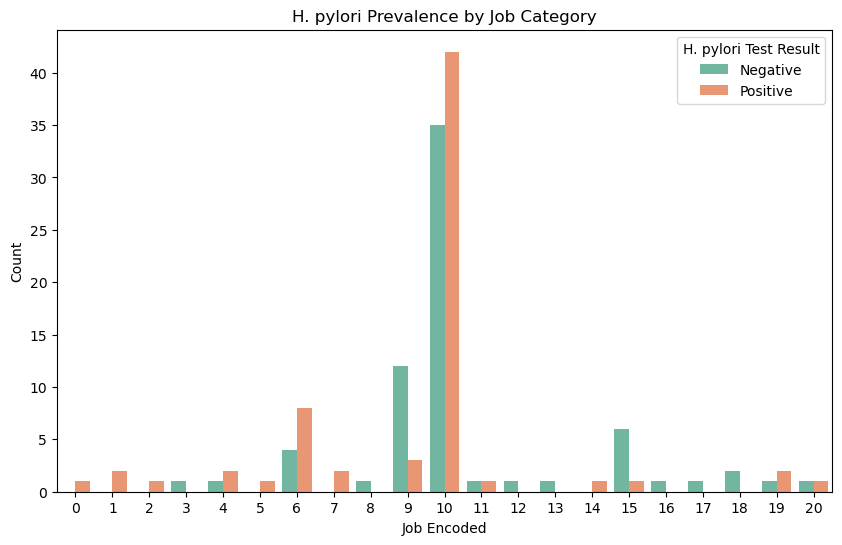

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job_encoded', hue='h_pylori_positive', palette='Set2')
plt.title('H. pylori Prevalence by Job Category')
plt.xlabel('Job Encoded')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.show()


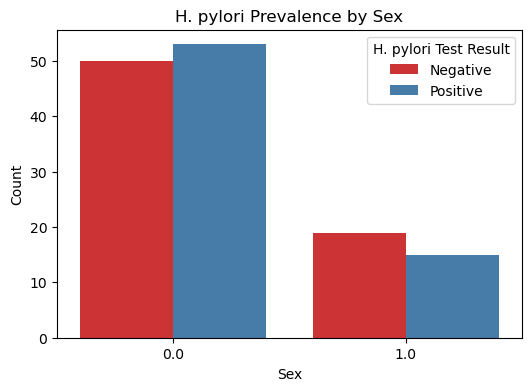

In [49]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', hue='h_pylori_positive', palette='Set1')
plt.title('H. pylori Prevalence by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.show()


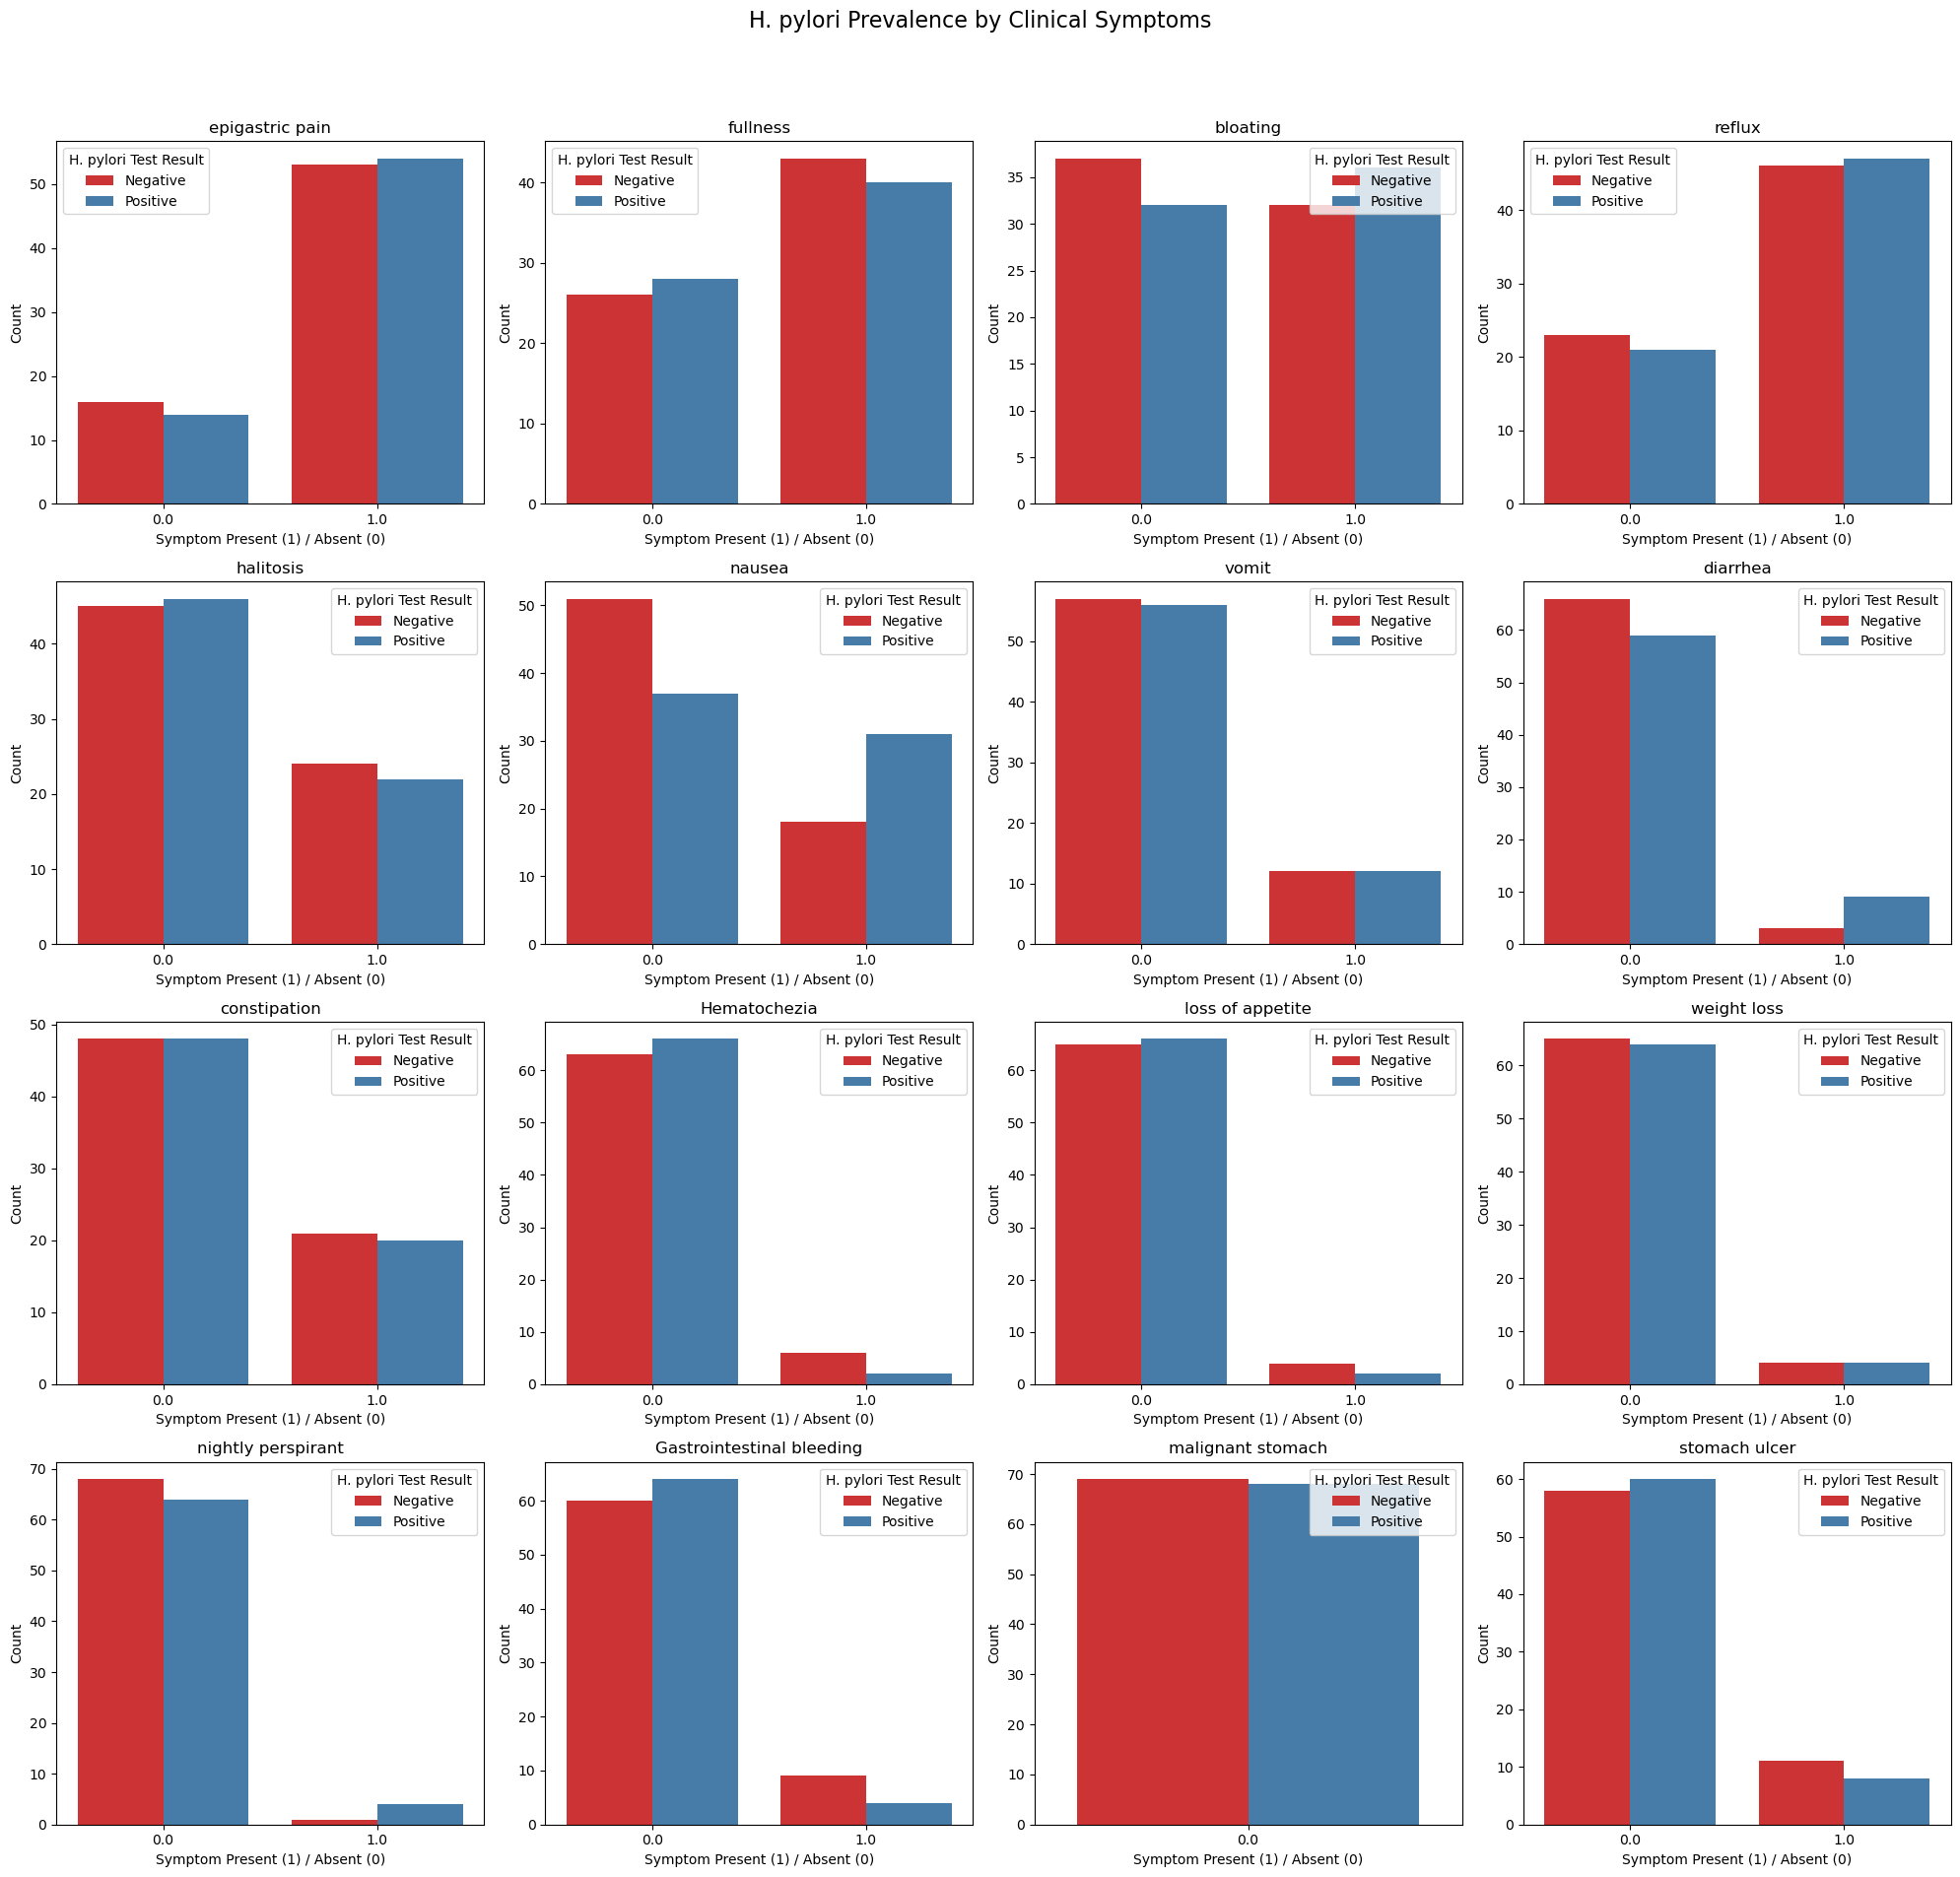

In [50]:
# List of clinical symptoms
symptoms = ['epigastric pain ', 'fullness', ' bloating', 'reflux', 'halitosis', ' nausea', 
            'vomit', ' diarrhea', ' constipation', 'Hematochezia', 'loss of appetite', 
            'weight loss', 'nightly perspirant', 'Gastrointestinal bleeding', 'malignant stomach', 
            'stomach ulcer']

# Set up a grid of plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.suptitle('H. pylori Prevalence by Clinical Symptoms', fontsize=16)

# Plot H. pylori prevalence for each symptom
for ax, symptom in zip(axes.flatten(), symptoms):
    sns.countplot(data=df, x=symptom, hue='h_pylori_positive', ax=ax, palette='Set1')
    ax.set_title(f'{symptom.strip()}')
    ax.set_xlabel('Symptom Present (1) / Absent (0)')
    ax.set_ylabel('Count')
    ax.legend(title='H. pylori Test Result')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


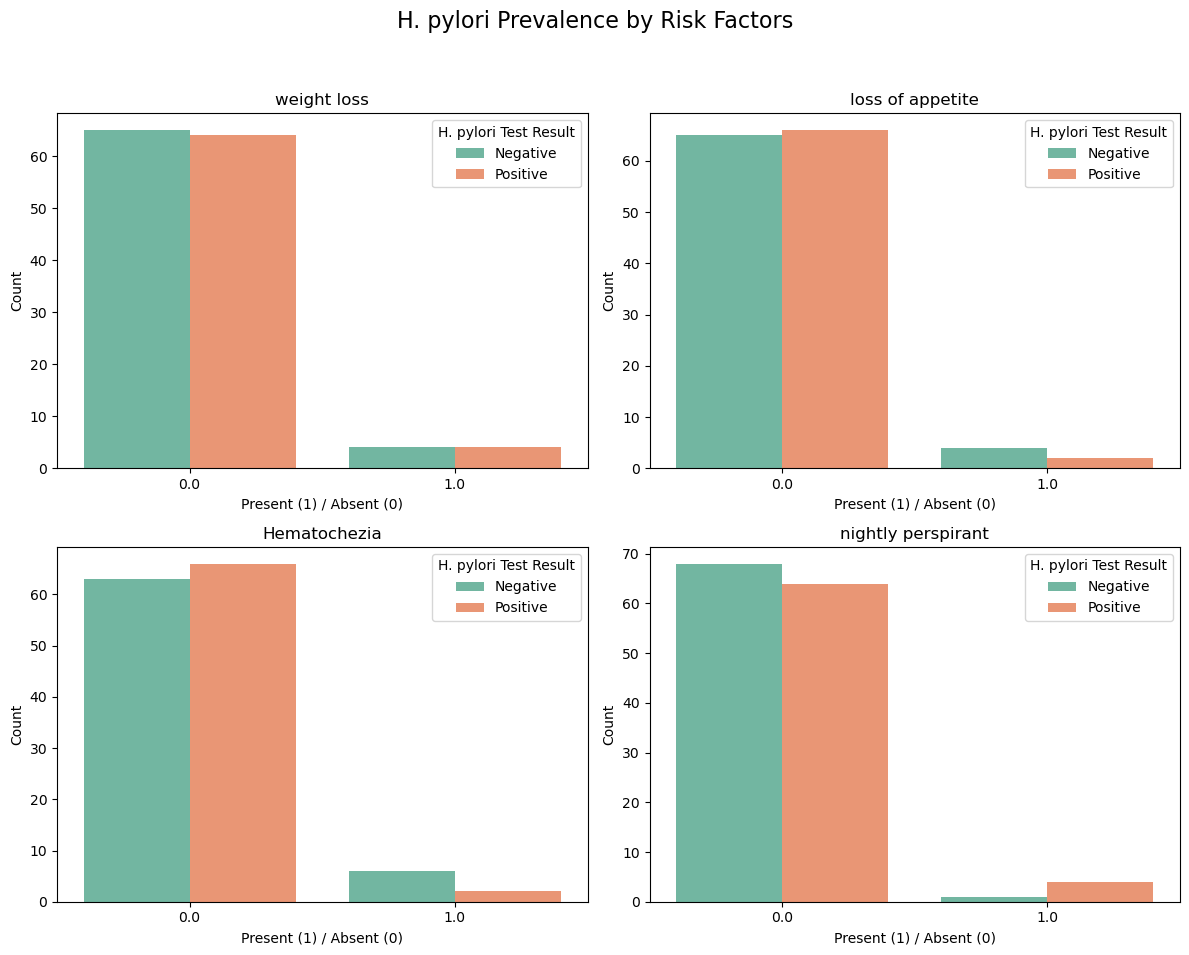

In [51]:
# List of risk factors
risk_factors = ['weight loss', 'loss of appetite', 'Hematochezia', 'nightly perspirant']

# Set up a grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('H. pylori Prevalence by Risk Factors', fontsize=16)

# Plot H. pylori prevalence for each risk factor
for ax, factor in zip(axes.flatten(), risk_factors):
    sns.countplot(data=df, x=factor, hue='h_pylori_positive', ax=ax, palette='Set2')
    ax.set_title(f'{factor.strip()}')
    ax.set_xlabel('Present (1) / Absent (0)')
    ax.set_ylabel('Count')
    ax.legend(title='H. pylori Test Result')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


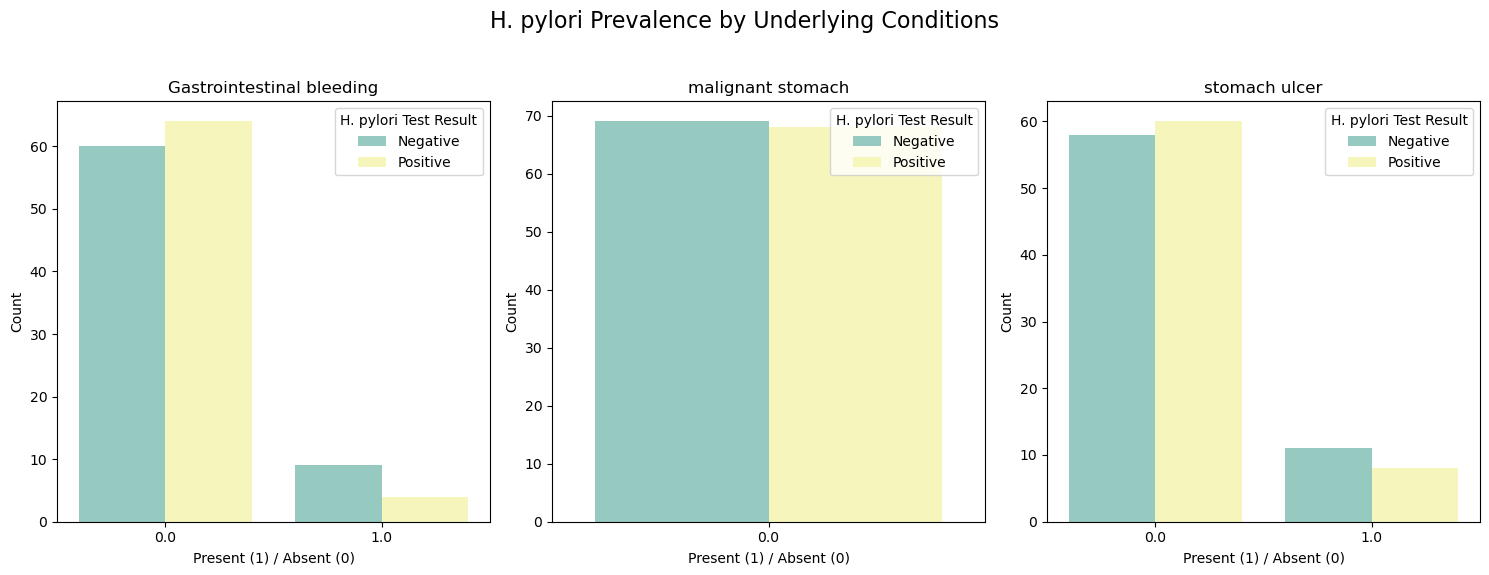

In [52]:
# List of underlying conditions
underlying_conditions = ['Gastrointestinal bleeding', 'malignant stomach', 'stomach ulcer']

# Set up a grid of plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
fig.suptitle('H. pylori Prevalence by Underlying Conditions', fontsize=16)

# Plot H. pylori prevalence for each condition
for ax, condition in zip(axes.flatten(), underlying_conditions):
    sns.countplot(data=df, x=condition, hue='h_pylori_positive', ax=ax, palette='Set3')
    ax.set_title(f'{condition.strip()}')
    ax.set_xlabel('Present (1) / Absent (0)')
    ax.set_ylabel('Count')
    ax.legend(title='H. pylori Test Result')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


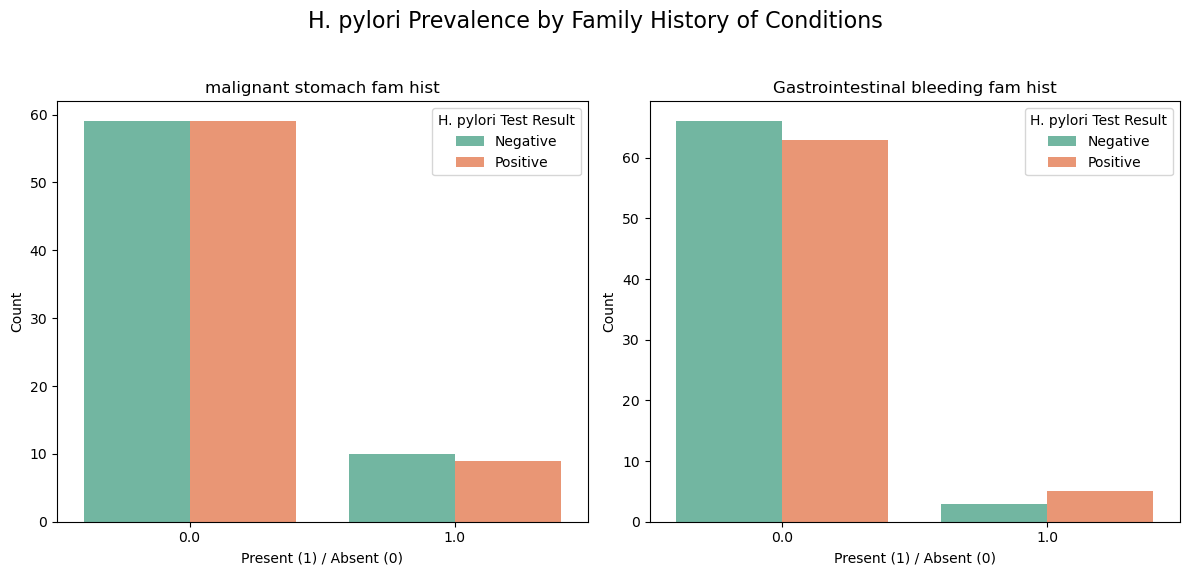

In [53]:
# List of family history conditions
family_history_conditions = ['malignant stomach fam hist', 'Gastrointestinal bleeding fam hist']

# Set up a grid of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('H. pylori Prevalence by Family History of Conditions', fontsize=16)

# Plot H. pylori prevalence for each family history condition
for ax, condition in zip(axes.flatten(), family_history_conditions):
    sns.countplot(data=df, x=condition, hue='h_pylori_positive', ax=ax, palette='Set2')
    ax.set_title(f'{condition.strip()}')
    ax.set_xlabel('Present (1) / Absent (0)')
    ax.set_ylabel('Count')
    ax.legend(title='H. pylori Test Result')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


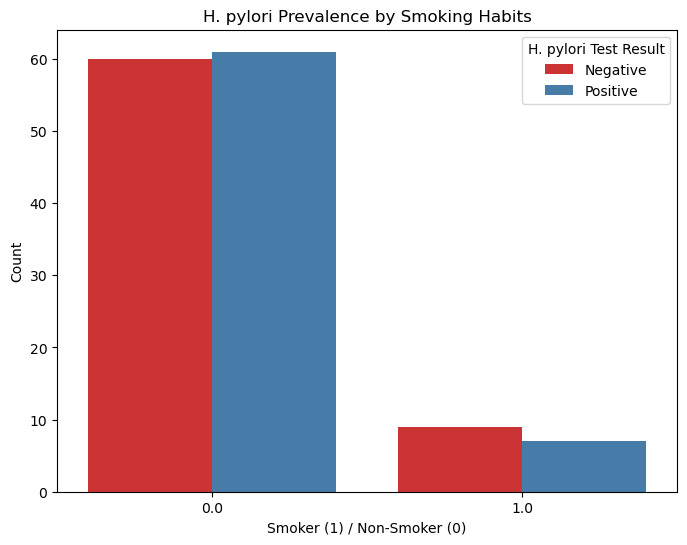

In [54]:
# Plot H. pylori prevalence based on smoking habits
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoker', hue='h_pylori_positive', palette='Set1')
plt.title('H. pylori Prevalence by Smoking Habits')
plt.xlabel('Smoker (1) / Non-Smoker (0)')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.show()


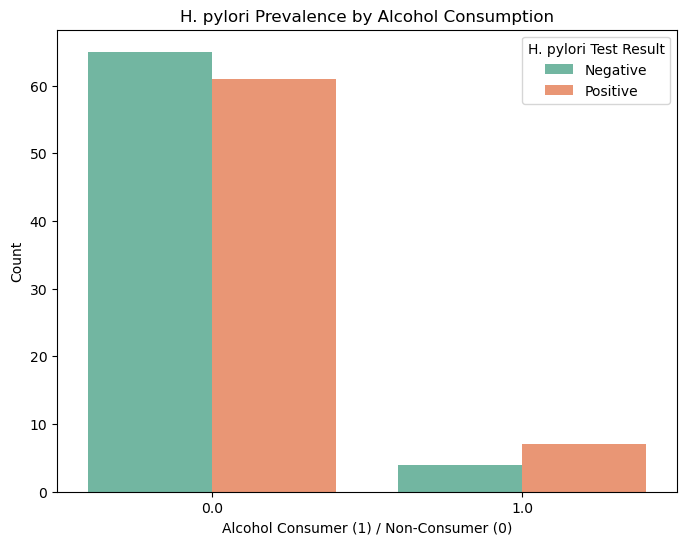

In [55]:
# Plot H. pylori prevalence based on alcohol consumption
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='alchohlic', hue='h_pylori_positive', palette='Set2')
plt.title('H. pylori Prevalence by Alcohol Consumption')
plt.xlabel('Alcohol Consumer (1) / Non-Consumer (0)')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.show()


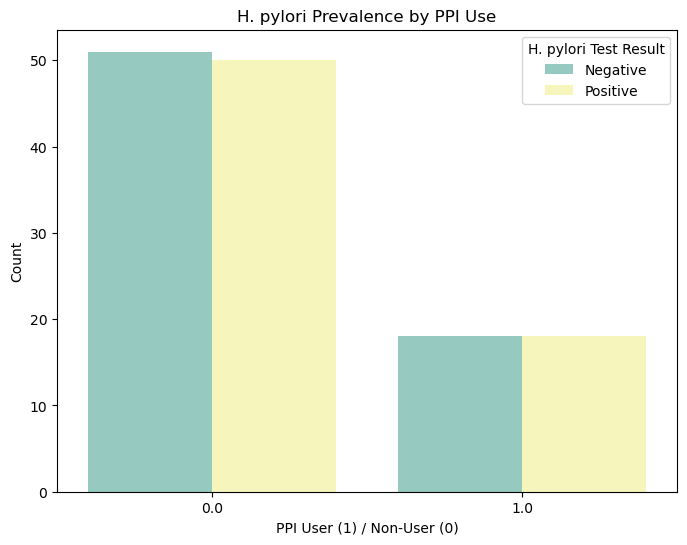

In [59]:
# Plot H. pylori prevalence based on PPI use
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=' ppi taking', hue='h_pylori_positive', palette='Set3')
plt.title('H. pylori Prevalence by PPI Use')
plt.xlabel('PPI User (1) / Non-User (0)')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.show()


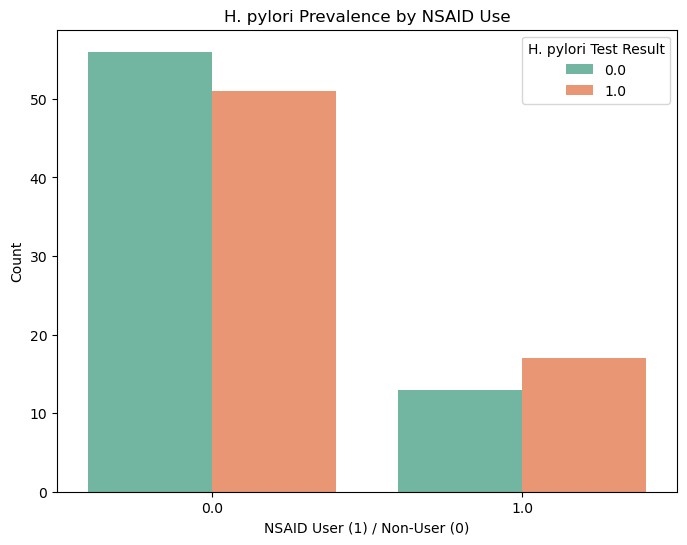

In [63]:
# Plot H. pylori prevalence based on NSAID use
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=' nsaid taking', hue='test result ', palette='Set2')
plt.title('H. pylori Prevalence by NSAID Use')
plt.xlabel('NSAID User (1) / Non-User (0)')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.show()


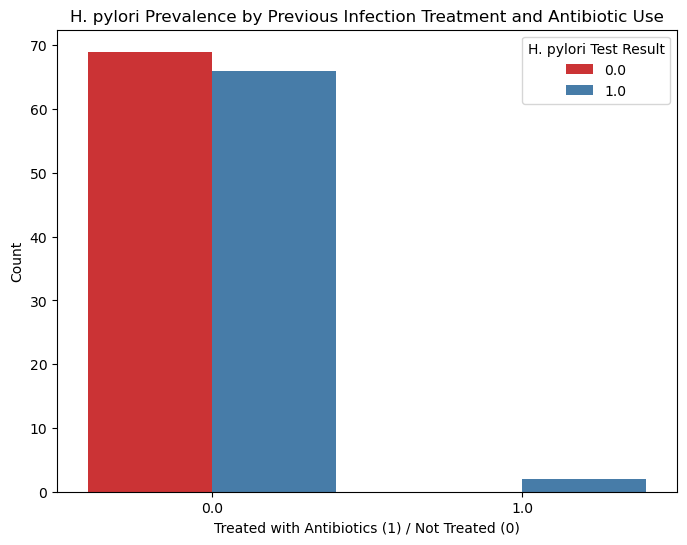

In [64]:
# Plot H. pylori prevalence based on previous infection treatment and antibiotic use
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Treatment of previous infection and use of antibiotics', hue='test result ', palette='Set1')
plt.title('H. pylori Prevalence by Previous Infection Treatment and Antibiotic Use')
plt.xlabel('Treated with Antibiotics (1) / Not Treated (0)')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.show()


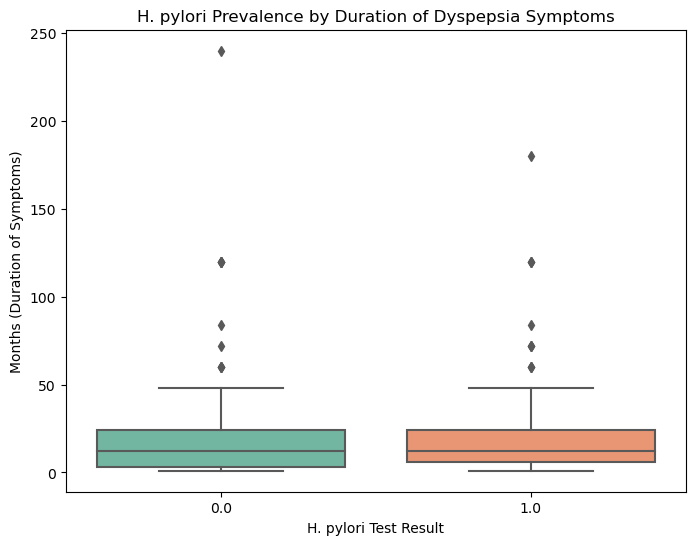

In [65]:
# Convert 'months' column to numeric if necessary (remove non-numeric values)
df['months'] = pd.to_numeric(df['months'], errors='coerce')

# Plot H. pylori prevalence based on duration of dyspepsia symptoms
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='test result ', y='months', palette='Set2')
plt.title('H. pylori Prevalence by Duration of Dyspepsia Symptoms')
plt.xlabel('H. pylori Test Result')
plt.ylabel('Months (Duration of Symptoms)')
plt.show()


In [116]:
## using perceptron as an ML Model

In [117]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Perceptron

# Define the preprocessing for numeric and categorical features
numeric_features = ['case no', 'age', 'sex', 'education', 'epigastric pain ', 'fullness',
                    ' bloating', 'reflux', 'halitosis', ' nausea', 'vomit', ' diarrhea',
                    ' constipation', 'months', 'Hematochezia', 'loss of appetite',
                    'weight loss', 'nightly perspirant', ' ppi taking', ' nsaid taking',
                    'alchohlic', 'smoker', 'Gastrointestinal bleeding', 'stomach ulcer',
                    'Gastrointestinal bleeding fam hist', 'malignant stomach fam hist']

categorical_low_features = []  # Add low cardinality features here
categorical_high_features = []  # Add high cardinality features here

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

categorical_low_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(fill_value='missing', strategy='constant')),
    ('encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

categorical_high_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(fill_value='missing', strategy='constant')),
    ('encoding', OrdinalEncoder())
])

# Combine all preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical_low', categorical_low_transformer, categorical_low_features),
        ('categorical_high', categorical_high_transformer, categorical_high_features)
    ]
)

# Create the complete model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', Perceptron(random_state=42, max_iter=1000, tol=0.001))
])

# Now the model is ready to be fitted with data


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
y = df['test result ']
X = df.drop(columns=['test result '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [108]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['case no', 'age', 'sex',
                                                   'education',
                                                   'epigastric pain ',
                                                   'fullness', ' bloating',
                                                   'reflux', 'halitosis',
                                                   ' nausea', 'vomit',
                                                   ' diarrhea', ' constipation',
                                                   'months', 'Hematochezia',
                                                   'loss of appetite',
                                                   'weight loss',
                                                   'nightly pe...
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  []),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  [])])),
                ('classifier', Perceptron(random_state=42))])

In [111]:
model.score(X,y)

0.6715328467153284

In [115]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.59      0.50      0.54        20
         1.0       0.60      0.68      0.64        22

    accuracy                           0.60        42
   macro avg       0.59      0.59      0.59        42
weighted avg       0.59      0.60      0.59        42



In [118]:
df

,case no,age,sex,education,epigastric pain,fullness,bloating,reflux,halitosis,nausea,...,malignant stomach,stomach ulcer,Gastrointestinal bleeding fam hist,malignant stomach fam hist,stomach ulcer.1,Revisit,test result,job_encoded,h_pylori_positive,age_group
1,1.0,43.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,Negative,41-60
2,2.0,48.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,Negative,41-60
3,3.0,54.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2,Positive,41-60
4,4.0,31.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10,Positive,21-40
5,5.0,36.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,11,Positive,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141.0,25.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,Negative,21-40
142,142.0,38.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10,Positive,21-40
143,143.0,63.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10,Positive,61-80
144,144.0,34.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,Negative,21-40


Removing outliers

In [119]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'months' column
Q1 = df['months'].quantile(0.25)
Q3 = df['months'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_clean = df[(df['months'] >= lower_bound) & (df['months'] <= upper_bound)]
df_clean

,case no,age,sex,education,epigastric pain,fullness,bloating,reflux,halitosis,nausea,...,malignant stomach,stomach ulcer,Gastrointestinal bleeding fam hist,malignant stomach fam hist,stomach ulcer.1,Revisit,test result,job_encoded,h_pylori_positive,age_group
2,2.0,48.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,Negative,41-60
4,4.0,31.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10,Positive,21-40
5,5.0,36.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,11,Positive,21-40
6,6.0,32.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10,Positive,21-40
7,7.0,50.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,10,Positive,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141.0,25.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,Negative,21-40
142,142.0,38.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10,Positive,21-40
143,143.0,63.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10,Positive,61-80
144,144.0,34.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,Negative,21-40


Model again

In [120]:
X_clean = df_clean.drop(columns=['test result '], axis=1)
y_clean = df_clean['test result ']
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

# Fit the model again with the cleaned data
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.45      0.29      0.36        17
         1.0       0.50      0.67      0.57        18

    accuracy                           0.49        35
   macro avg       0.48      0.48      0.46        35
weighted avg       0.48      0.49      0.47        35



In [128]:
df_clean.isnull().sum()

case no                                                   0
age                                                       0
sex                                                       0
education                                                 0
epigastric pain                                           0
fullness                                                  0
 bloating                                                 0
reflux                                                    0
halitosis                                                 0
 nausea                                                   0
vomit                                                     0
 diarrhea                                                 0
 constipation                                             0
months                                                    0
Hematochezia                                              0
loss of appetite                                          0
weight loss                             

SVC

In [ ]:
#-۱ بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس اطلاعات دموگرافیک (سن و جنس و شغل)


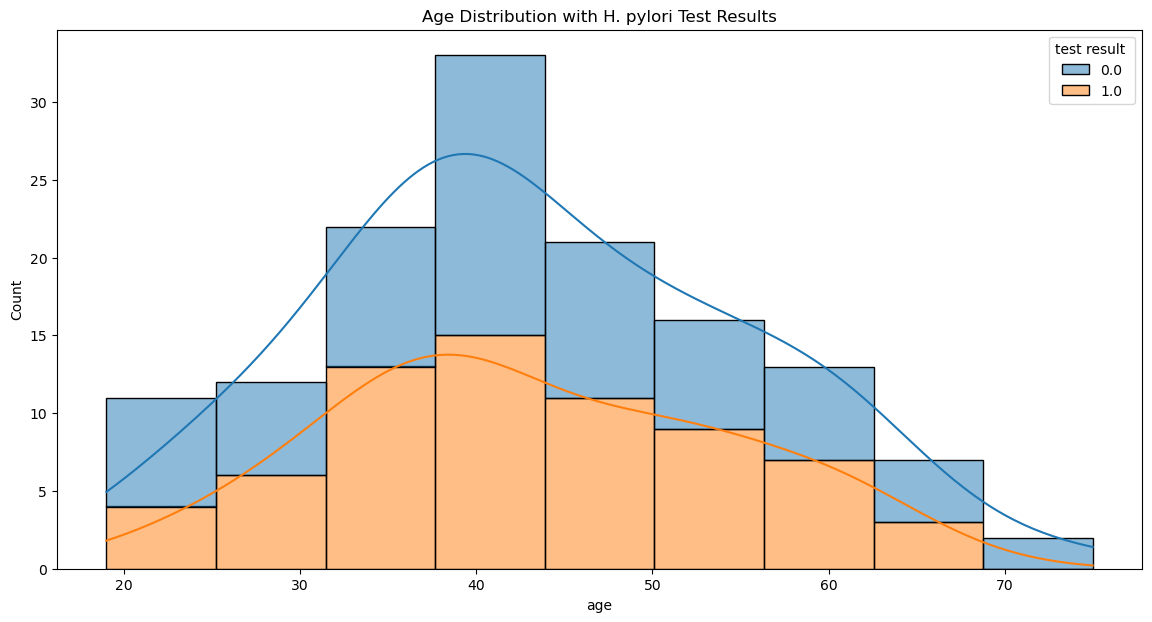

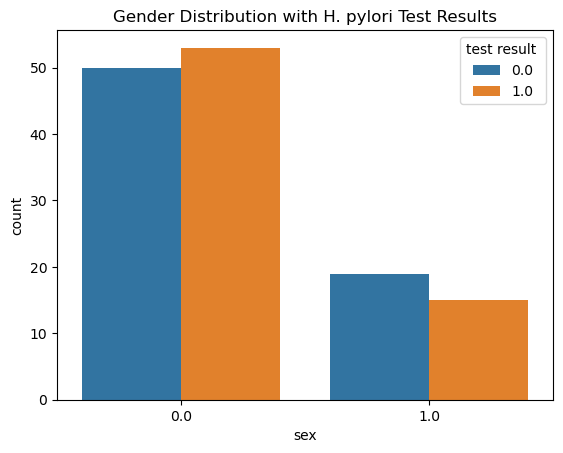

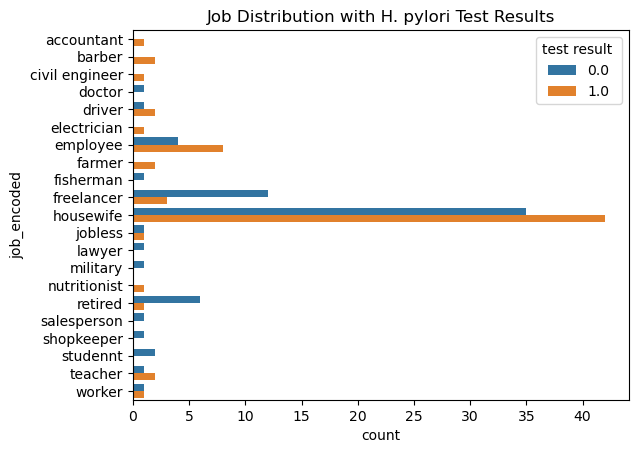

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution with H. pylori test results
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='age', hue='test result ', multiple='stack', kde=True)
plt.title('Age Distribution with H. pylori Test Results')
plt.show()

# Gender distribution with H. pylori test results
sns.countplot(data=df, x='sex', hue='test result ')
plt.title('Gender Distribution with H. pylori Test Results')
plt.show()

# Job distribution with H. pylori test results
sns.countplot(data=df, y='job_encoded', hue='test result ')
plt.title('Job Distribution with H. pylori Test Results')
plt.yticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.show()


In [4]:
#-۲ بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس علایم بالینی


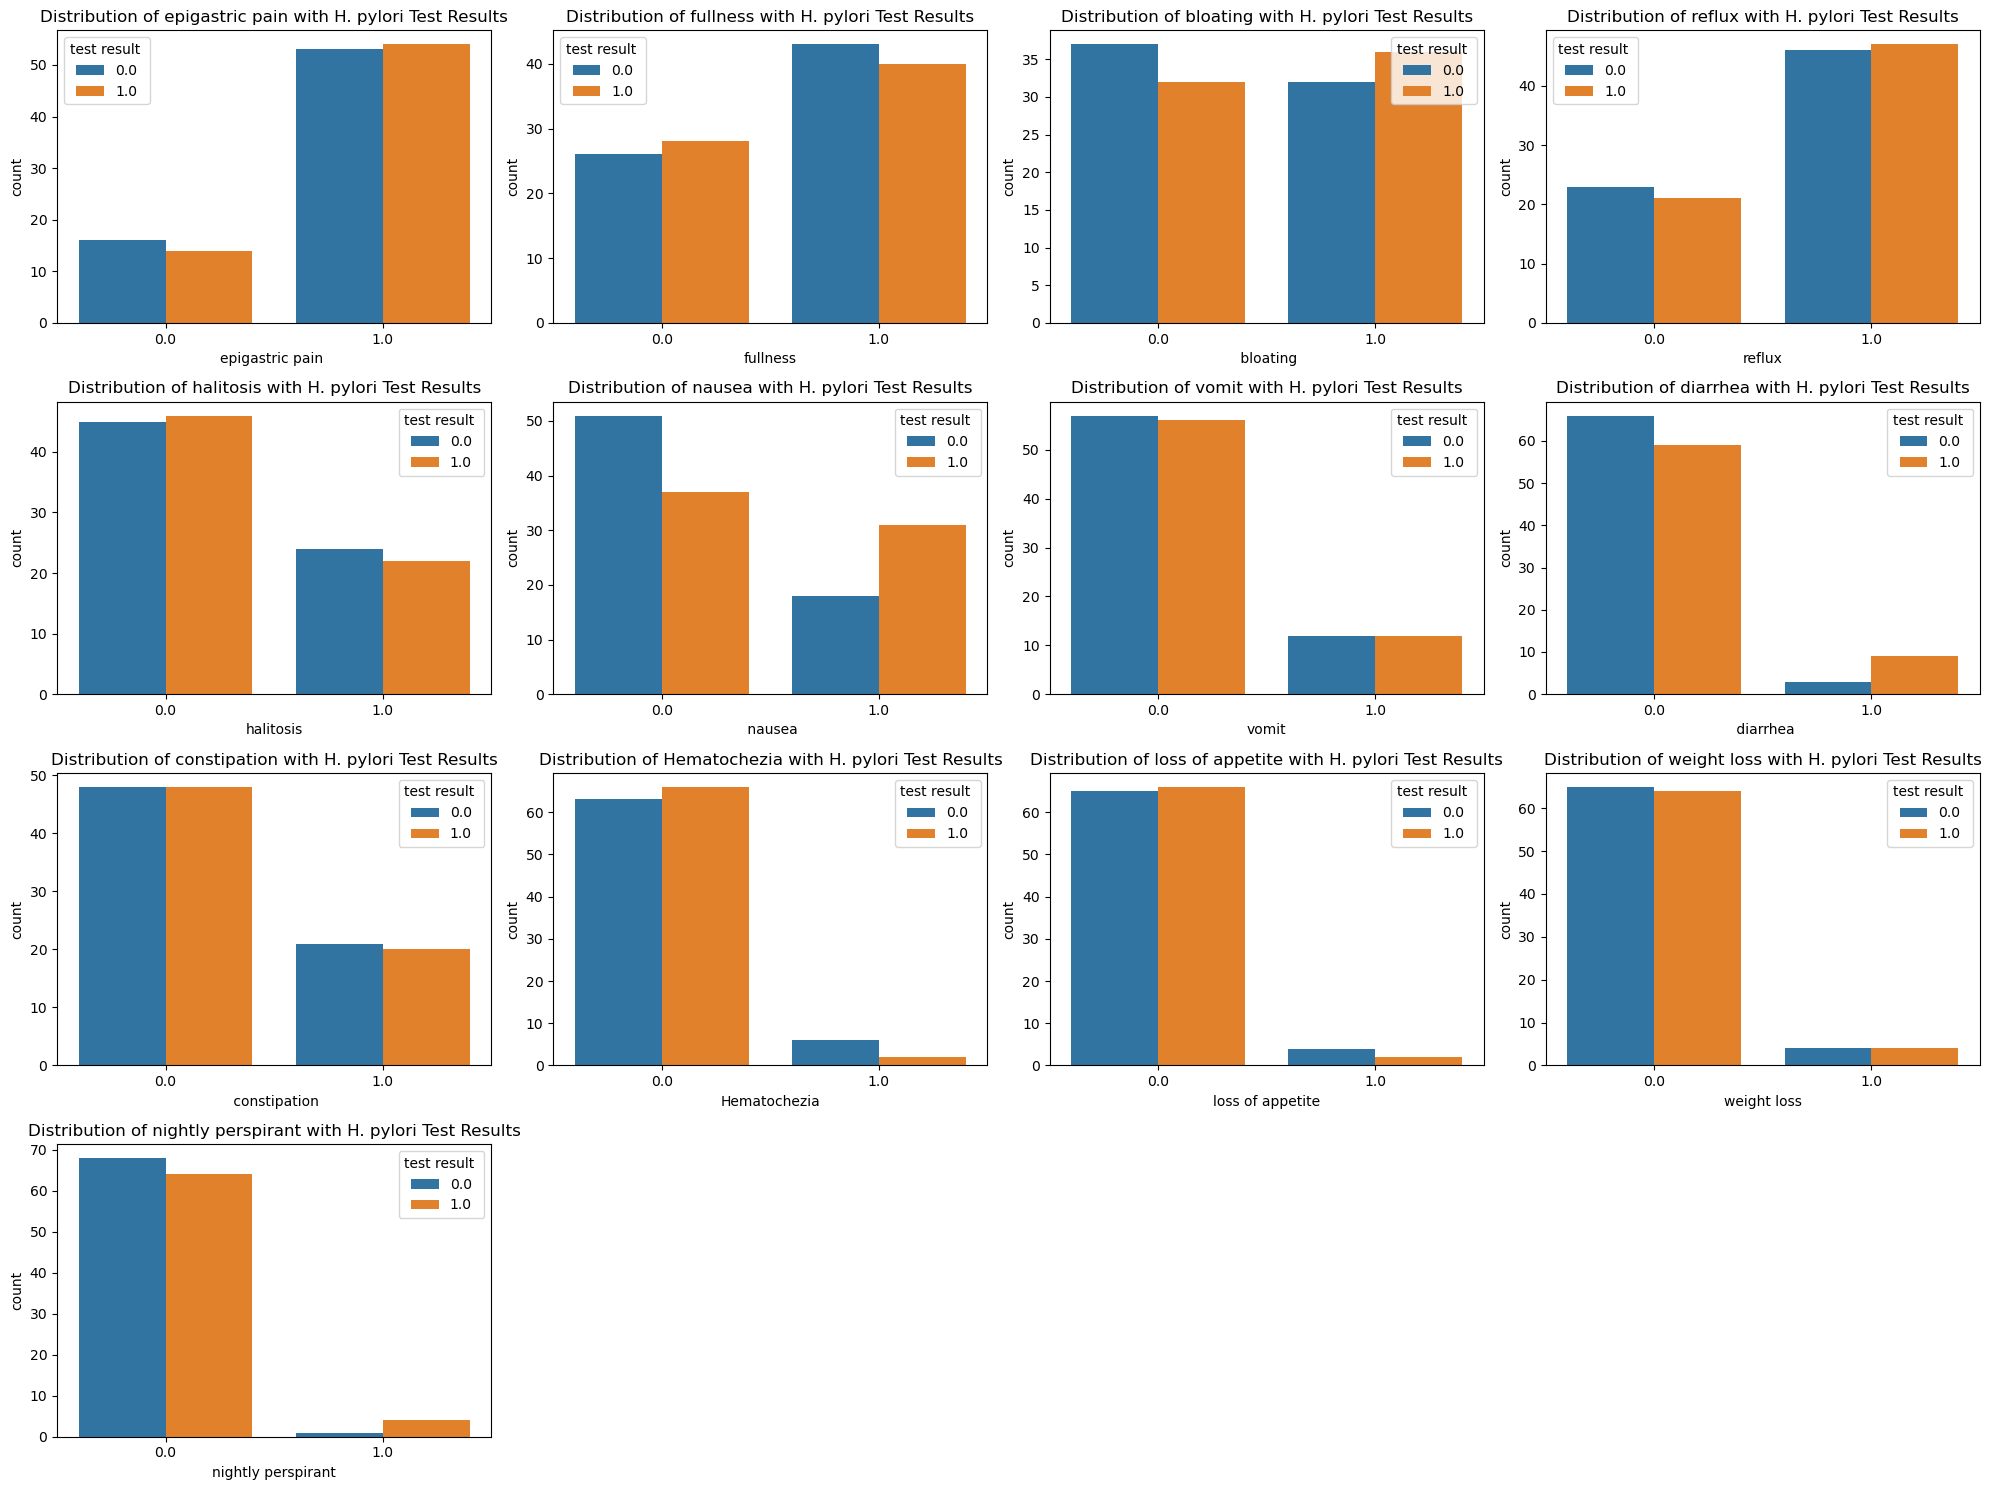

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Symptoms distribution with H. pylori test results
plt.figure(figsize=(20, 15))

# Select clinical symptom columns
symptoms = ['epigastric pain ', 'fullness', ' bloating', 'reflux', 'halitosis', ' nausea', 'vomit', ' diarrhea', ' constipation', 'Hematochezia', 'loss of appetite', 'weight loss', 'nightly perspirant']

# Plot distributions for each symptom
for i, symptom in enumerate(symptoms, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=symptom, hue='test result ')
    plt.title(f'Distribution of {symptom.strip()} with H. pylori Test Results')

plt.tight_layout()
plt.show()


In [7]:
#بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس علایم خطر ( کاهش وزن ، کاهش اشتها ، مدفوع
#خونی ، تعریق شبانه

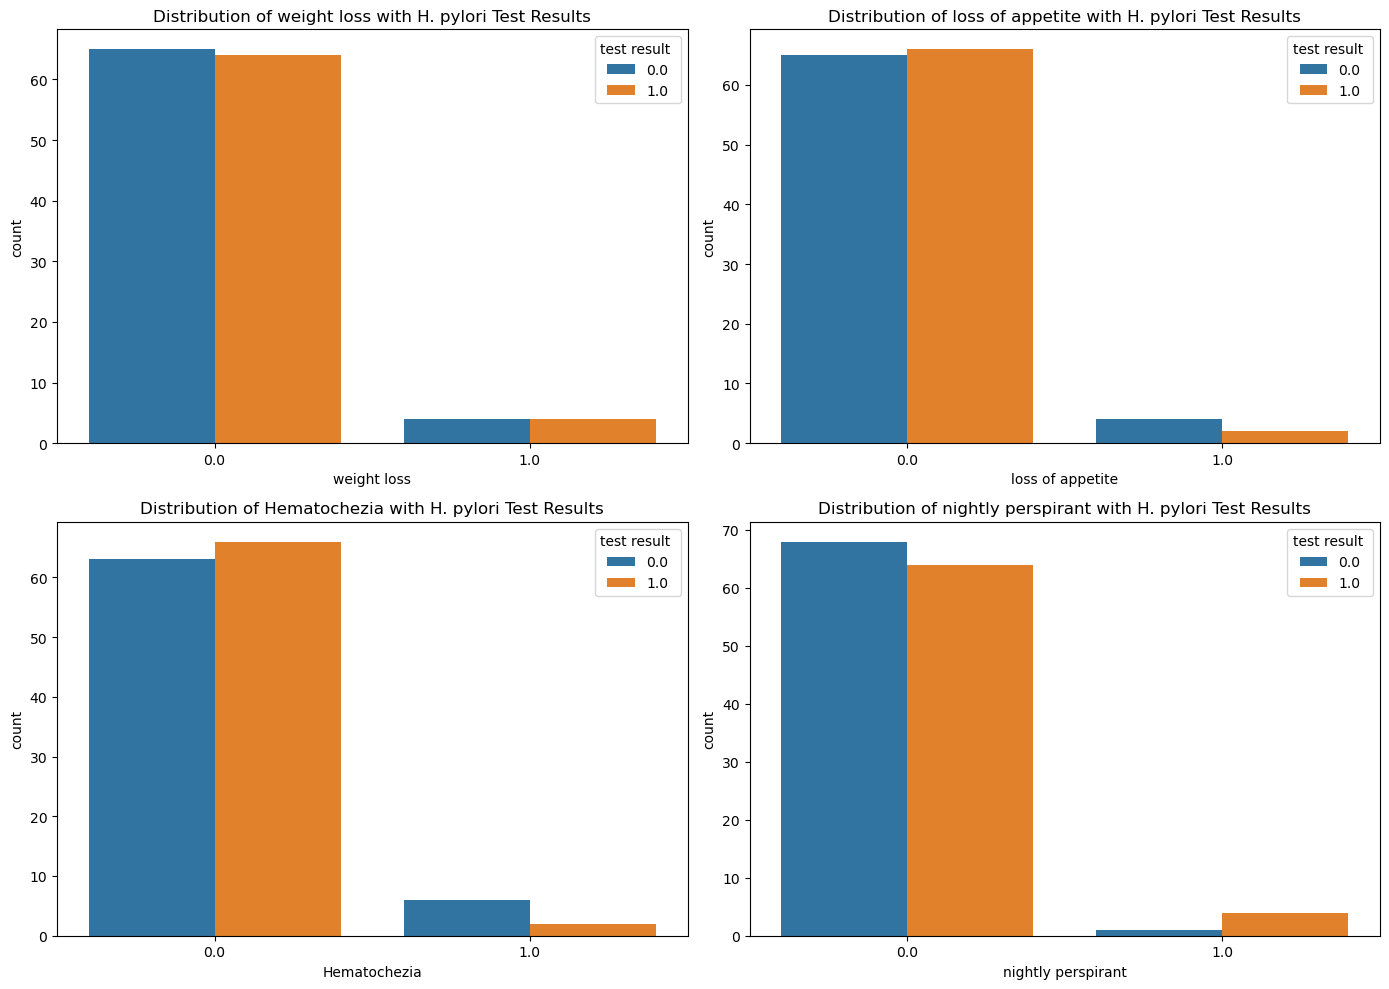

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# High-risk symptoms distribution with H. pylori test results
plt.figure(figsize=(14, 10))

# Select high-risk symptom columns
high_risk_symptoms = ['weight loss', 'loss of appetite', 'Hematochezia', 'nightly perspirant']

# Plot distributions for each high-risk symptom
for i, symptom in enumerate(high_risk_symptoms, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=symptom, hue='test result ')
    plt.title(f'Distribution of {symptom.strip()} with H. pylori Test Results')

plt.tight_layout()
plt.show()


In [11]:
# ۴ بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس سابقه بیماری زمینه ای (سابقه خون ریزی
# گوارشی ، سابقه زخم معده ، سابقه بدخیمی معده)

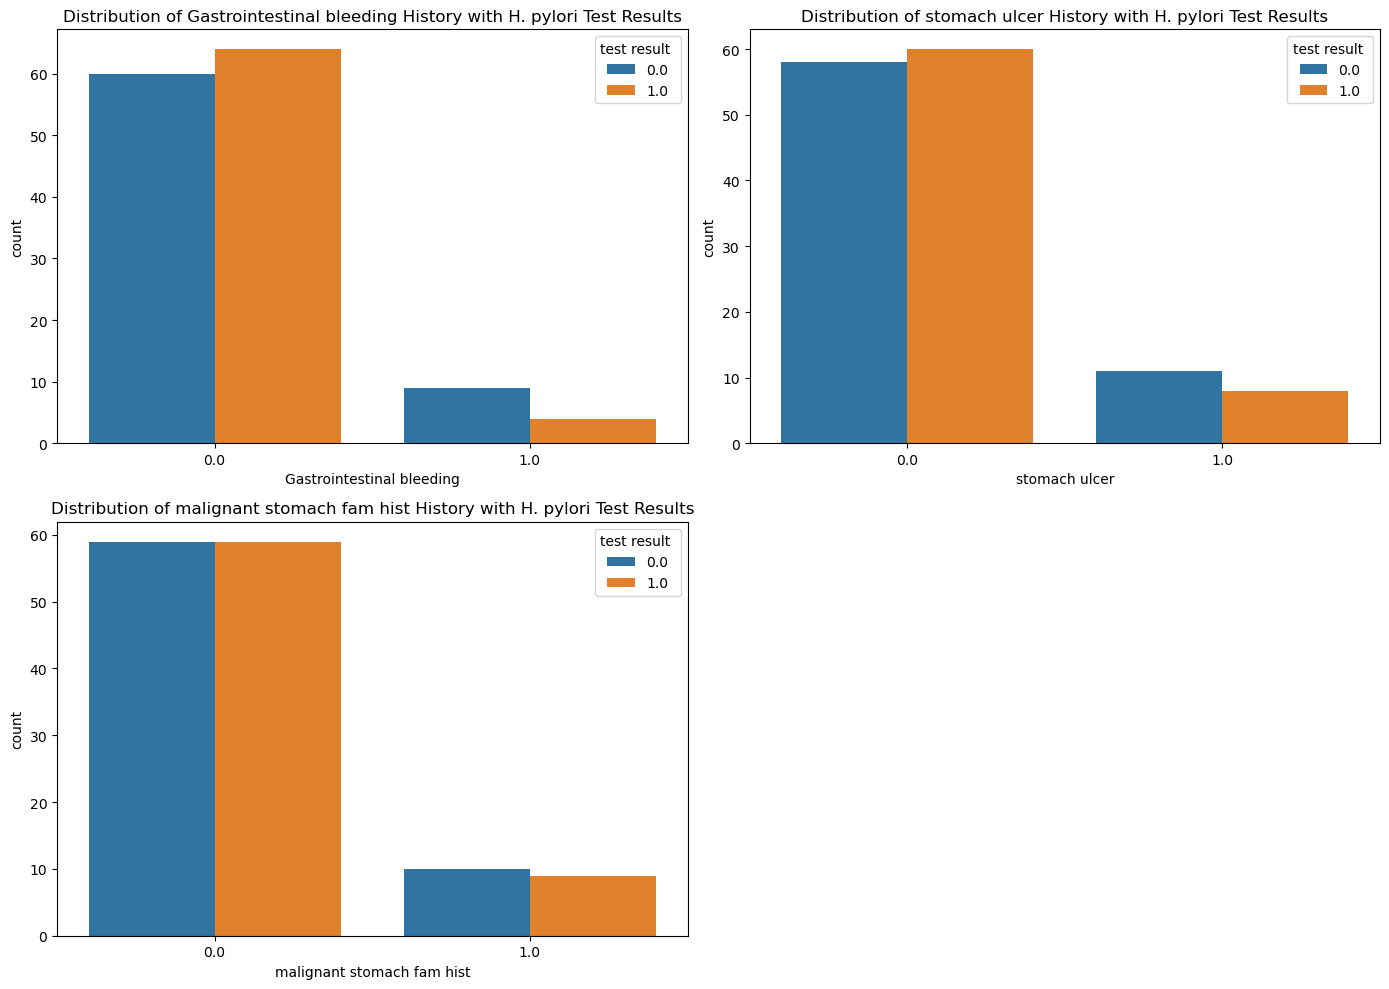

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# History of underlying diseases distribution with H. pylori test results
plt.figure(figsize=(14, 10))

# Select history of underlying diseases columns
underlying_diseases = ['Gastrointestinal bleeding', 'stomach ulcer', 'malignant stomach fam hist']

# Plot distributions for each underlying disease history
for i, disease in enumerate(underlying_diseases, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=disease, hue='test result ')
    plt.title(f'Distribution of {disease.strip()} History with H. pylori Test Results')

plt.tight_layout()
plt.show()


In [13]:
# ۵ بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس سابقه خانوادگی (سابقه خانوادگی بدخیمی معده
# ، سابقه خانوادگی خون ریزی گوارشی)

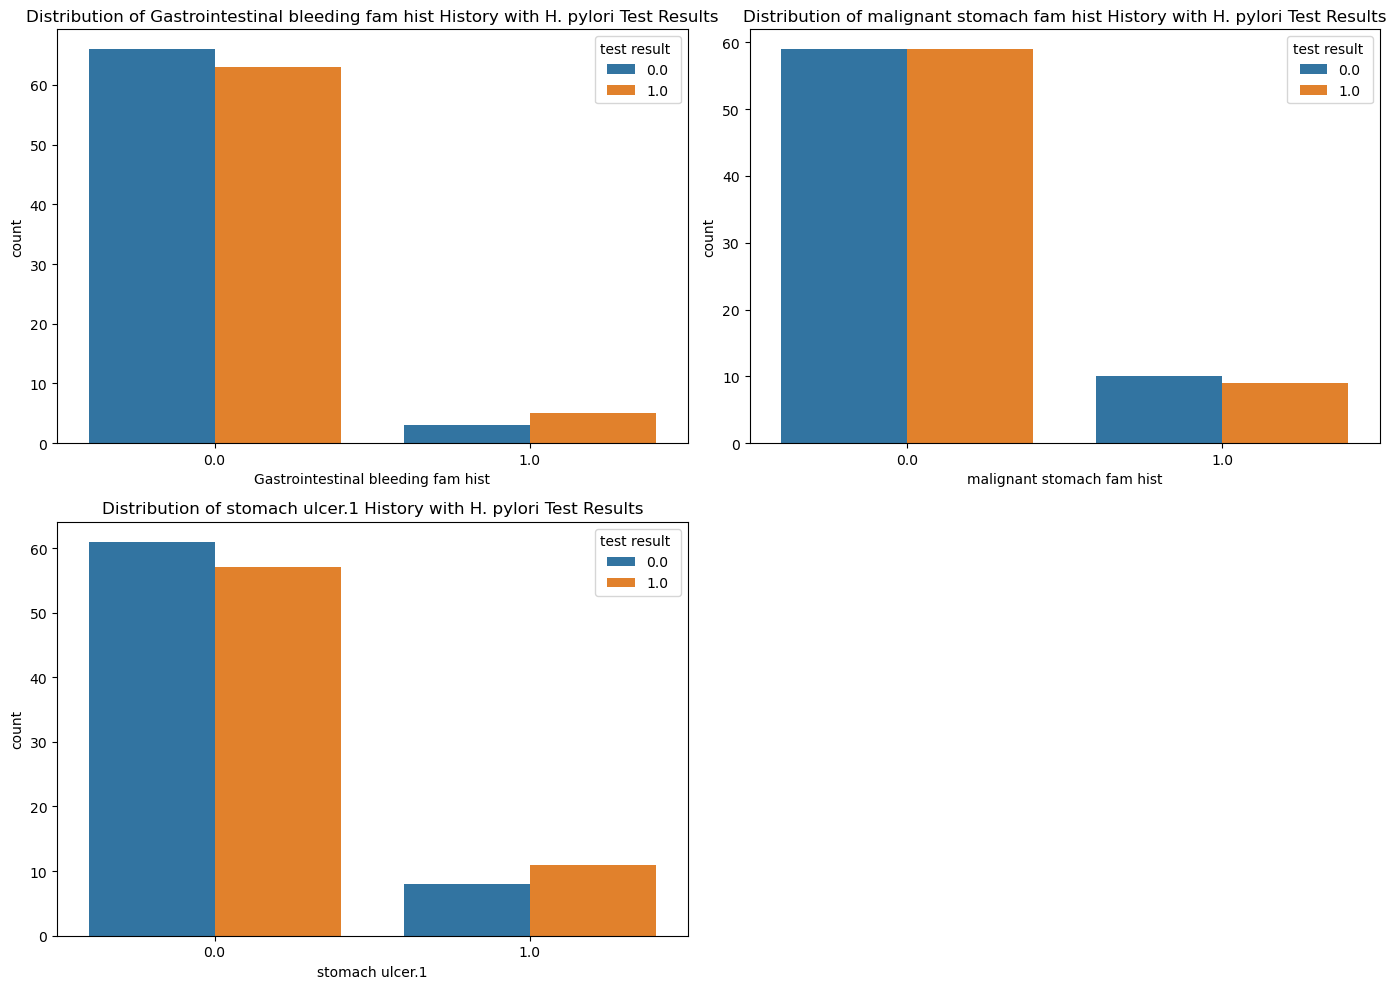

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Family history distribution with H. pylori test results
plt.figure(figsize=(14, 10))

# Select family history columns
family_history = ['Gastrointestinal bleeding fam hist', 'malignant stomach fam hist', 'stomach ulcer.1']

# Plot distributions for each family history
for i, history in enumerate(family_history, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=history, hue='test result ')
    plt.title(f'Distribution of {history.strip()} History with H. pylori Test Results')

plt.tight_layout()
plt.show()


In [15]:
# -۶ بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس مصرف سیگار


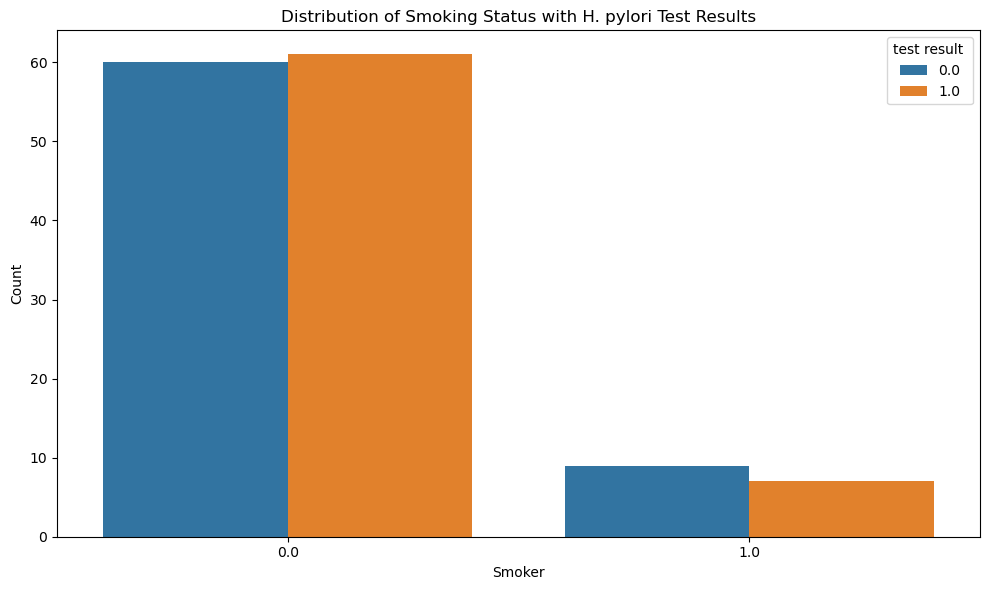

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Smoking status distribution with H. pylori test results
plt.figure(figsize=(10, 6))

# Plot distribution for smoking status
sns.countplot(data=df, x='smoker', hue='test result ')
plt.title('Distribution of Smoking Status with H. pylori Test Results')
plt.xlabel('Smoker')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# -۷ بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس مصرف الکل


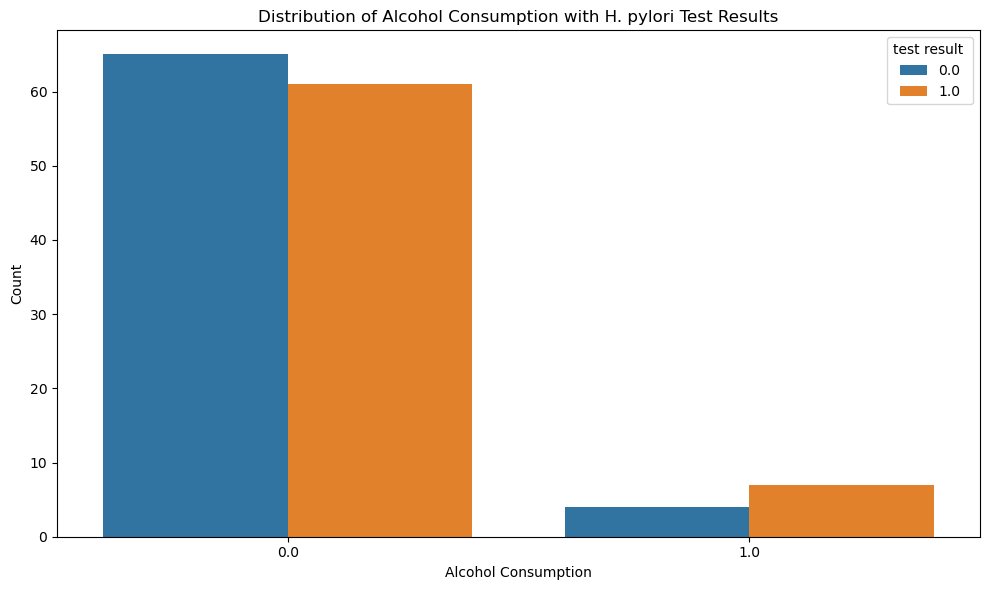

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Alcohol consumption distribution with H. pylori test results
plt.figure(figsize=(10, 6))

# Plot distribution for alcohol consumption
sns.countplot(data=df, x='alchohlic', hue='test result ')
plt.title('Distribution of Alcohol Consumption with H. pylori Test Results')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# -۸ بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس مصرف دارو های PPI


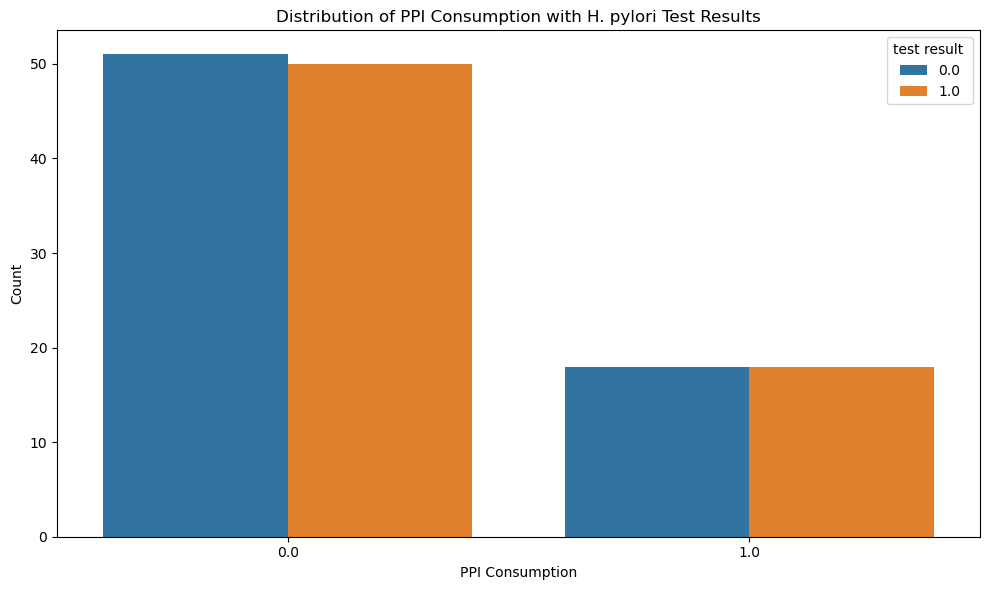

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# PPI consumption distribution with H. pylori test results
plt.figure(figsize=(10, 6))

# Plot distribution for PPI consumption
sns.countplot(data=df, x=' ppi taking', hue='test result ')
plt.title('Distribution of PPI Consumption with H. pylori Test Results')
plt.xlabel('PPI Consumption')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# -۹ بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس مصرف دارو ها یNSAID


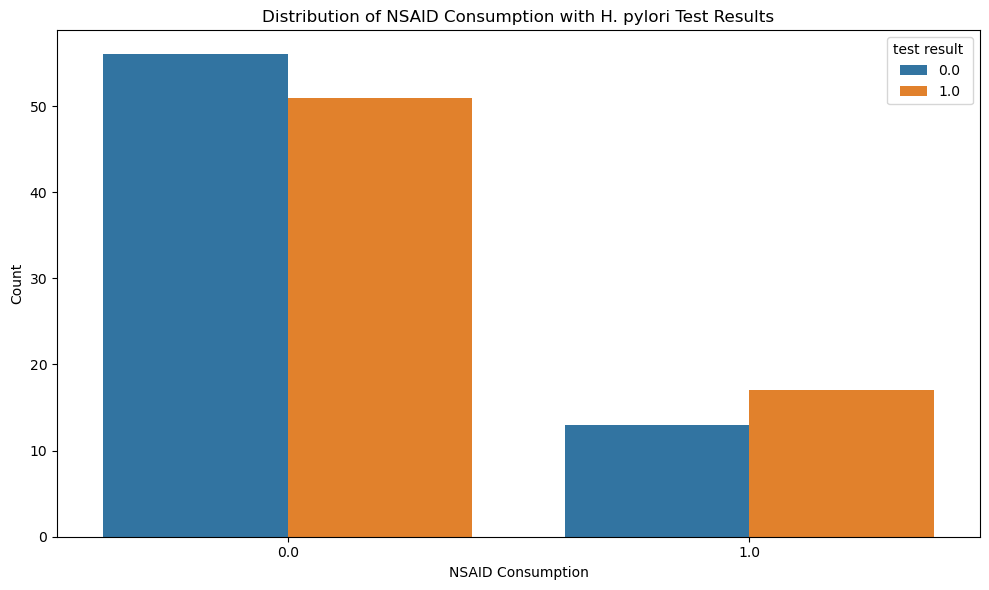

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# NSAID consumption distribution with H. pylori test results
plt.figure(figsize=(10, 6))

# Plot distribution for NSAID consumption
sns.countplot(data=df, x=' nsaid taking', hue='test result ')
plt.title('Distribution of NSAID Consumption with H. pylori Test Results')
plt.xlabel('NSAID Consumption')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# -۱۰ بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس درمان عفونت قبلی و دریافت آنتی بیوتیک


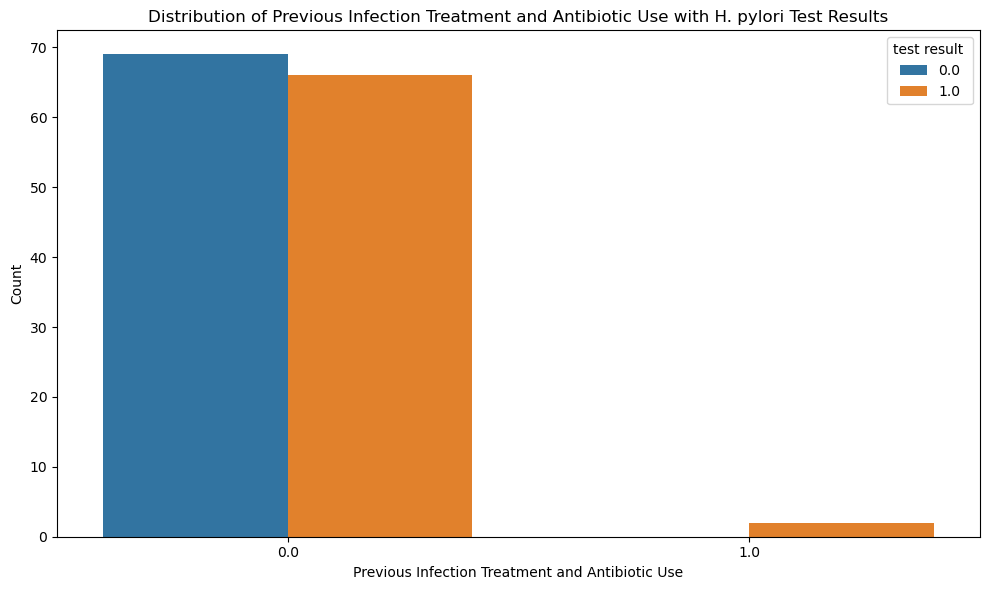

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Previous infection treatment and antibiotic use distribution with H. pylori test results
plt.figure(figsize=(10, 6))

# Plot distribution for previous infection treatment and antibiotic use
sns.countplot(data=df, x='Treatment of previous infection and use of antibiotics', hue='test result ')
plt.title('Distribution of Previous Infection Treatment and Antibiotic Use with H. pylori Test Results')
plt.xlabel('Previous Infection Treatment and Antibiotic Use')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [21]:
# -۱۱ بررسی شیوع اچ پیلوری در بیماران دیسپپتیک به روش تست یو بی تی بر اساس مدت زمان شروع علایم دیسپپسیا


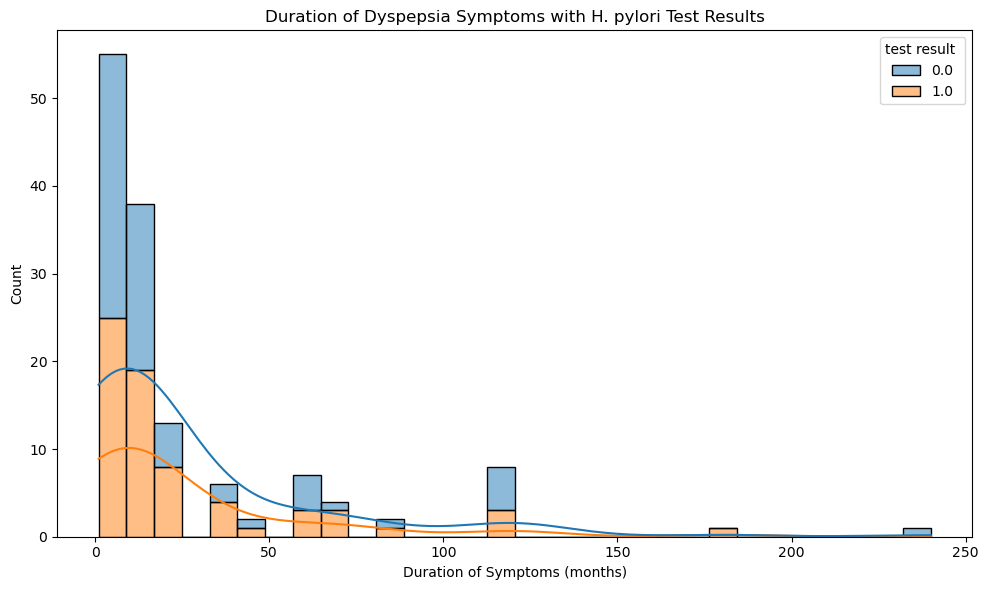

In [22]:
# Duration of symptoms distribution with H. pylori test results
plt.figure(figsize=(10, 6))

# Plot distribution for duration of symptoms
sns.histplot(data=df, x='months', hue='test result ', multiple='stack', kde=True)
plt.title('Duration of Dyspepsia Symptoms with H. pylori Test Results')
plt.xlabel('Duration of Symptoms (months)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [23]:
# فرضیات و سوالات

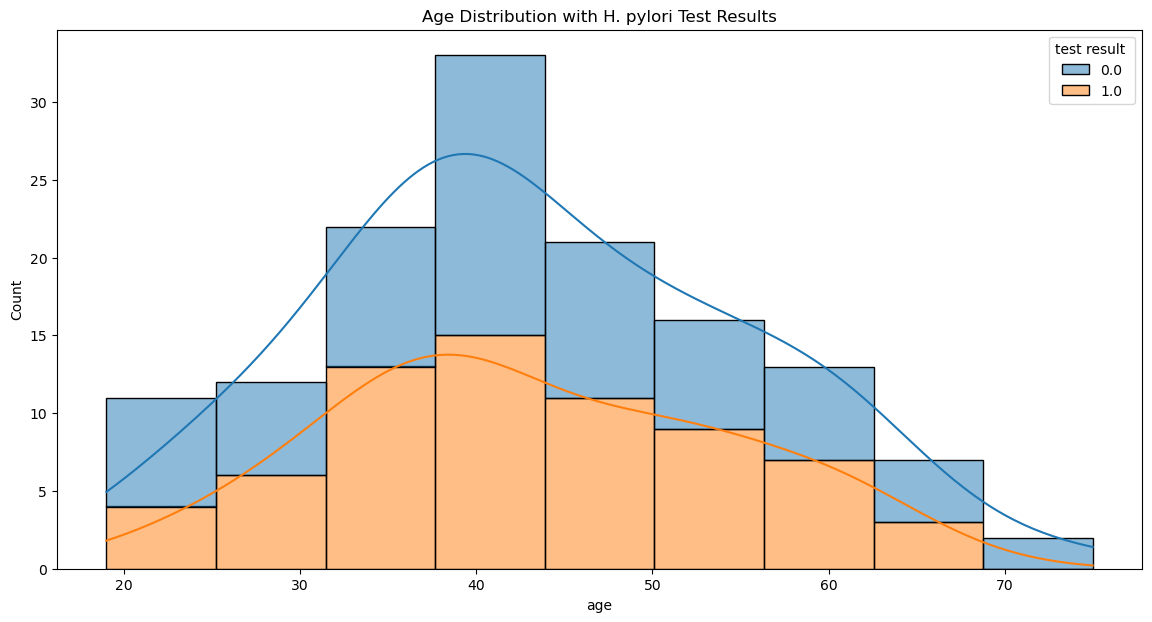

In [24]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='age', hue='test result ', multiple='stack', kde=True)
plt.title('Age Distribution with H. pylori Test Results')
plt.show()


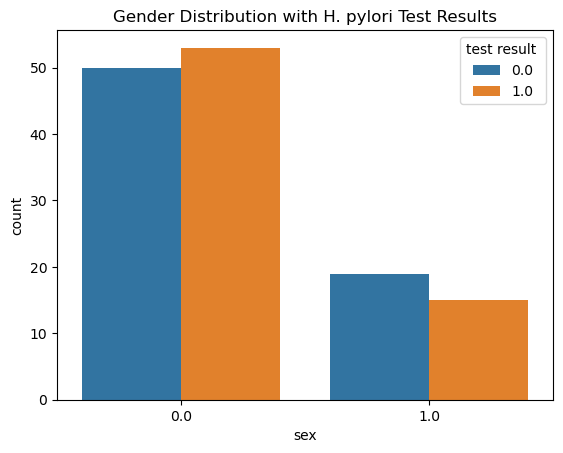

In [25]:
sns.countplot(x='sex', data=df, hue='test result ')
plt.title('Gender Distribution with H. pylori Test Results')
plt.show()


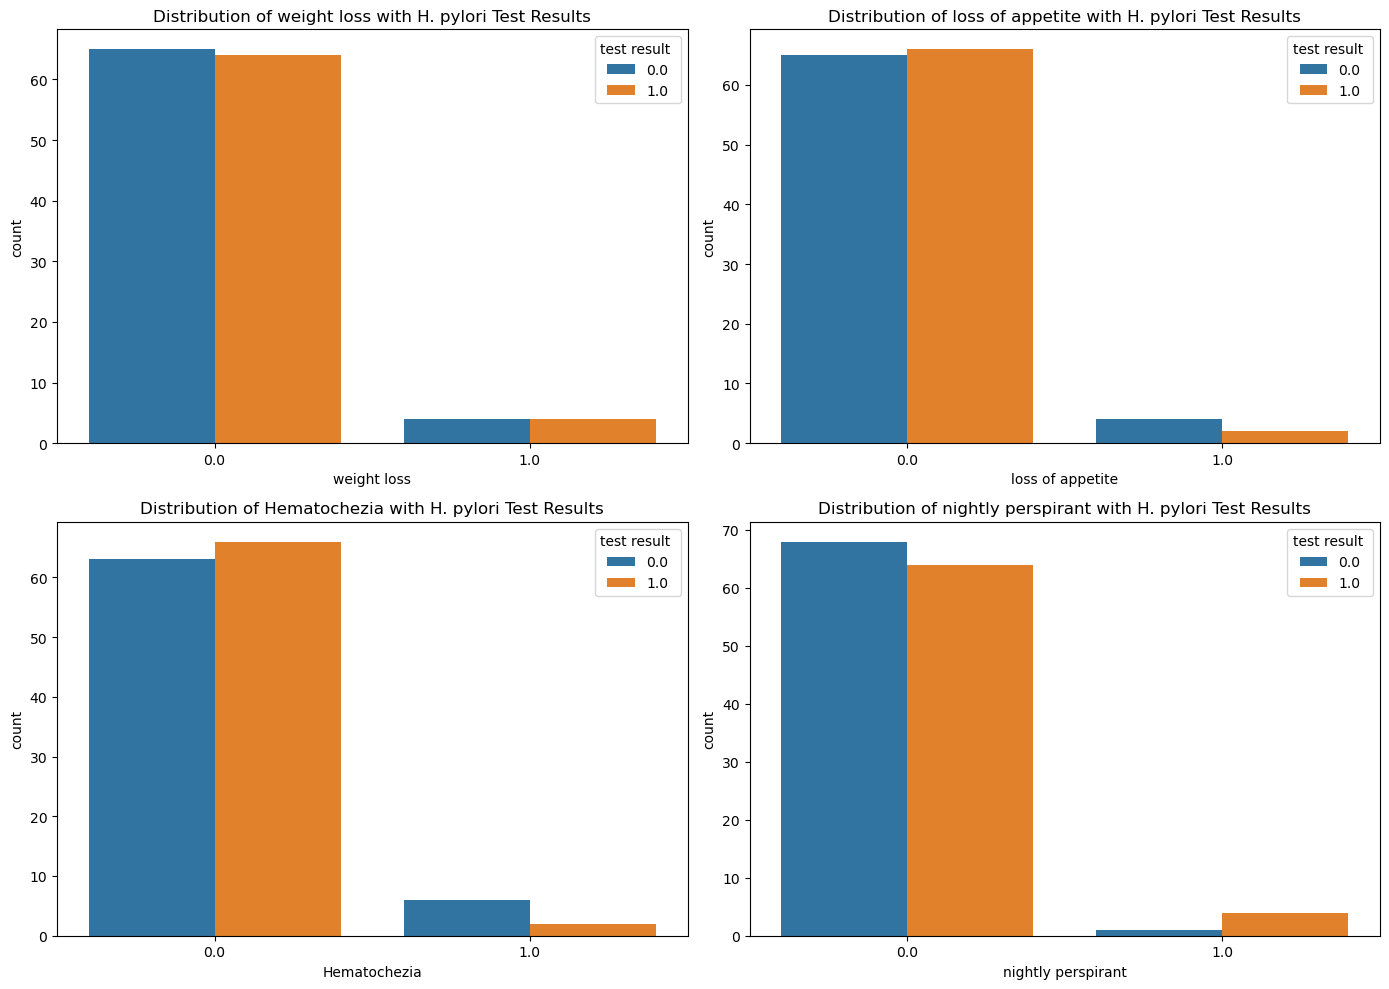

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# High-risk symptoms distribution with H. pylori test results
plt.figure(figsize=(14, 10))

# Select high-risk symptom columns
high_risk_symptoms = ['weight loss', 'loss of appetite', 'Hematochezia', 'nightly perspirant']

# Plot distributions for each high-risk symptom
for i, symptom in enumerate(high_risk_symptoms, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=symptom, hue='test result ')
    plt.title(f'Distribution of {symptom.strip()} with H. pylori Test Results')

plt.tight_layout()
plt.show()


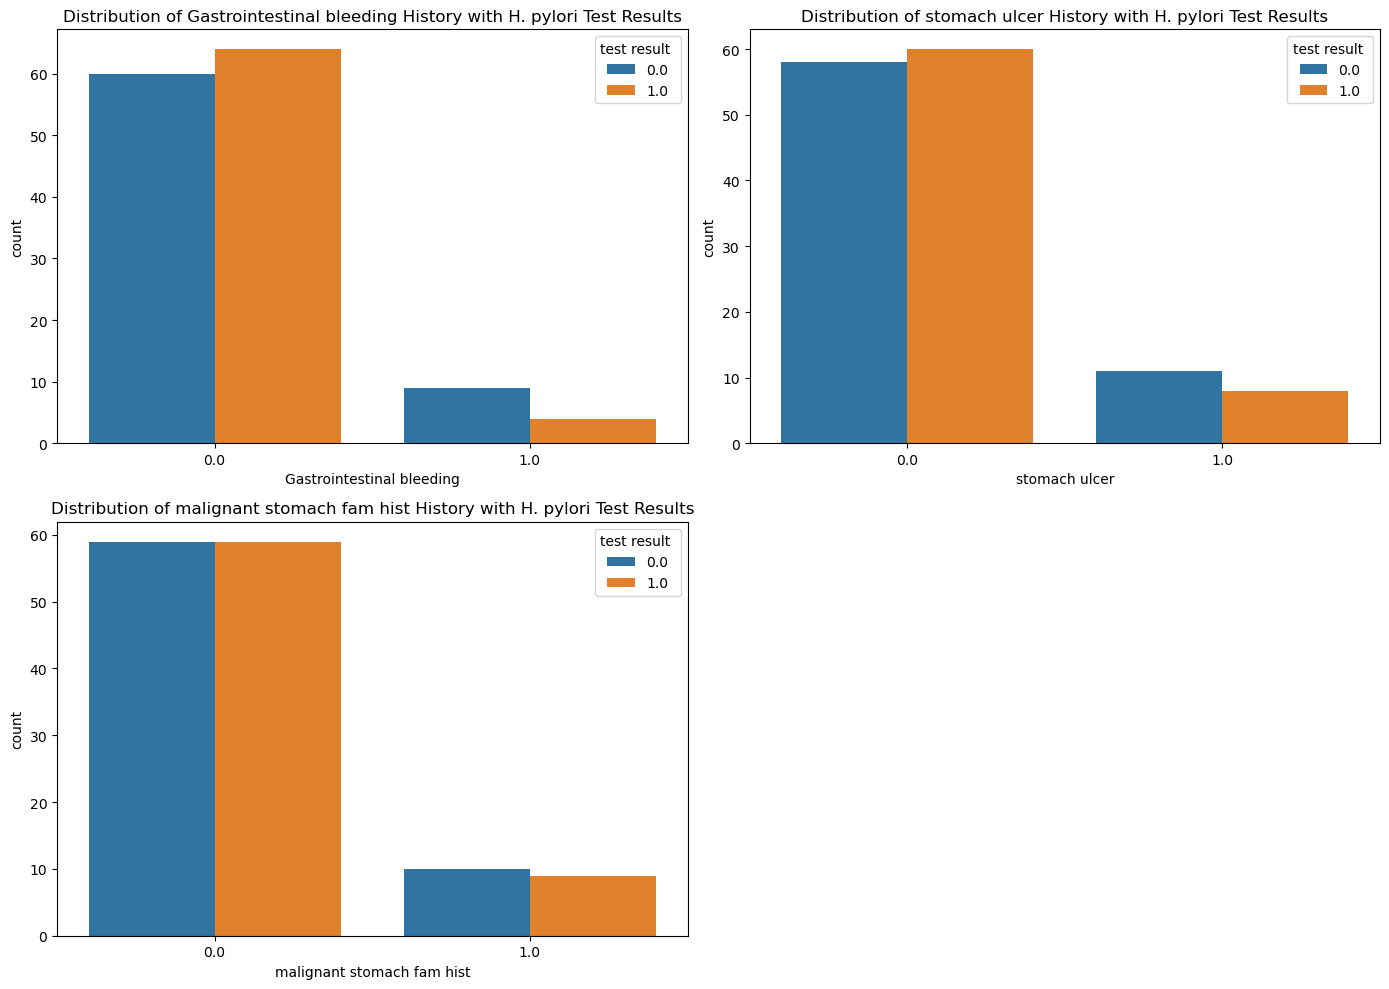

In [31]:
# History of underlying diseases distribution with H. pylori test results
plt.figure(figsize=(14, 10))
underlying_diseases = ['Gastrointestinal bleeding', 'stomach ulcer', 'malignant stomach fam hist']

for i, disease in enumerate(underlying_diseases, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=disease, hue='test result ')
    plt.title(f'Distribution of {disease.strip()} History with H. pylori Test Results')

plt.tight_layout()
plt.show()


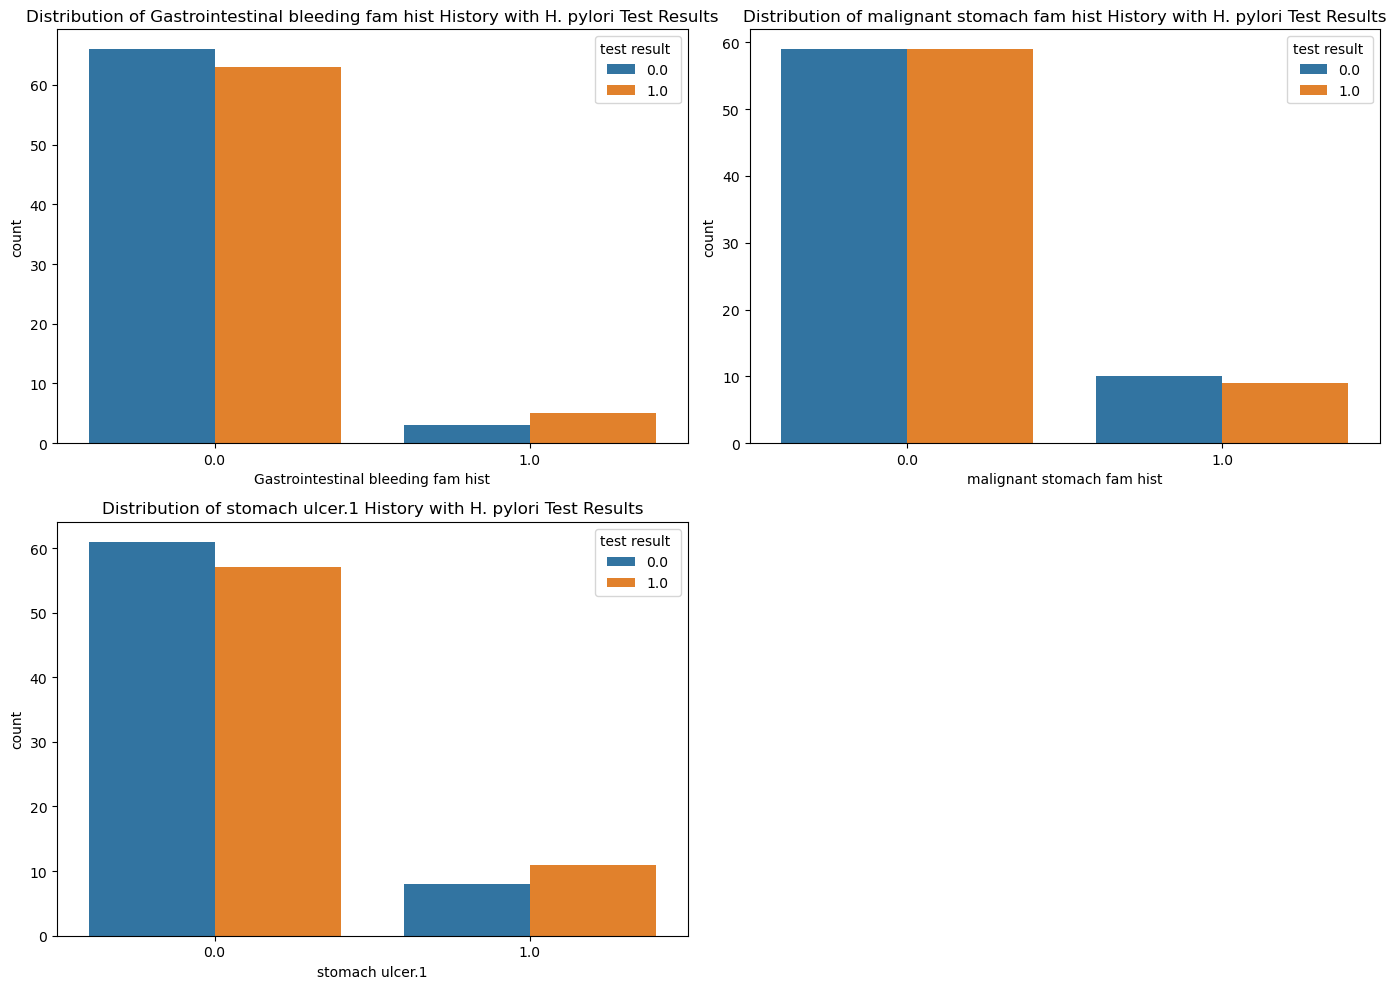

In [32]:
# Family history distribution with H. pylori test results
plt.figure(figsize=(14, 10))
family_history = ['Gastrointestinal bleeding fam hist', 'malignant stomach fam hist', 'stomach ulcer.1']

for i, history in enumerate(family_history, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=history, hue='test result ')
    plt.title(f'Distribution of {history.strip()} History with H. pylori Test Results')

plt.tight_layout()
plt.show()


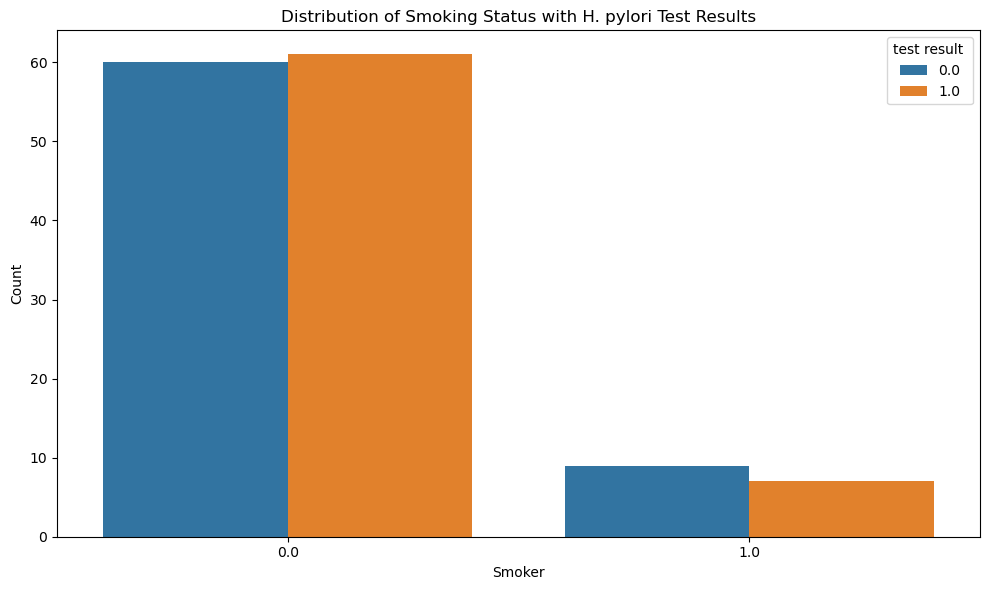

In [33]:
# Smoking status distribution with H. pylori test results
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoker', hue='test result ')
plt.title('Distribution of Smoking Status with H. pylori Test Results')
plt.xlabel('Smoker')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


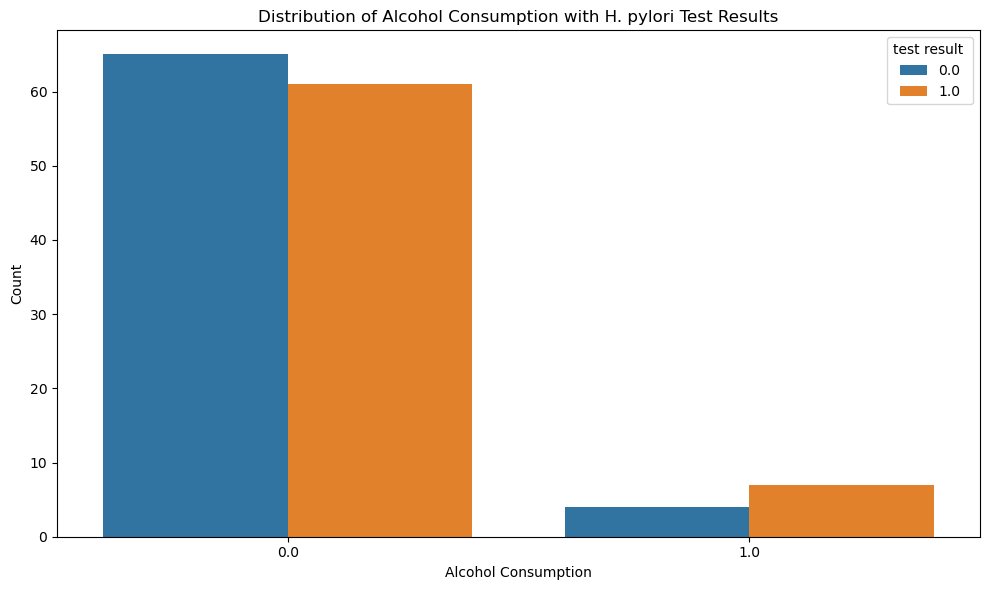

In [34]:
# Alcohol consumption distribution with H. pylori test results
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='alchohlic', hue='test result ')
plt.title('Distribution of Alcohol Consumption with H. pylori Test Results')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


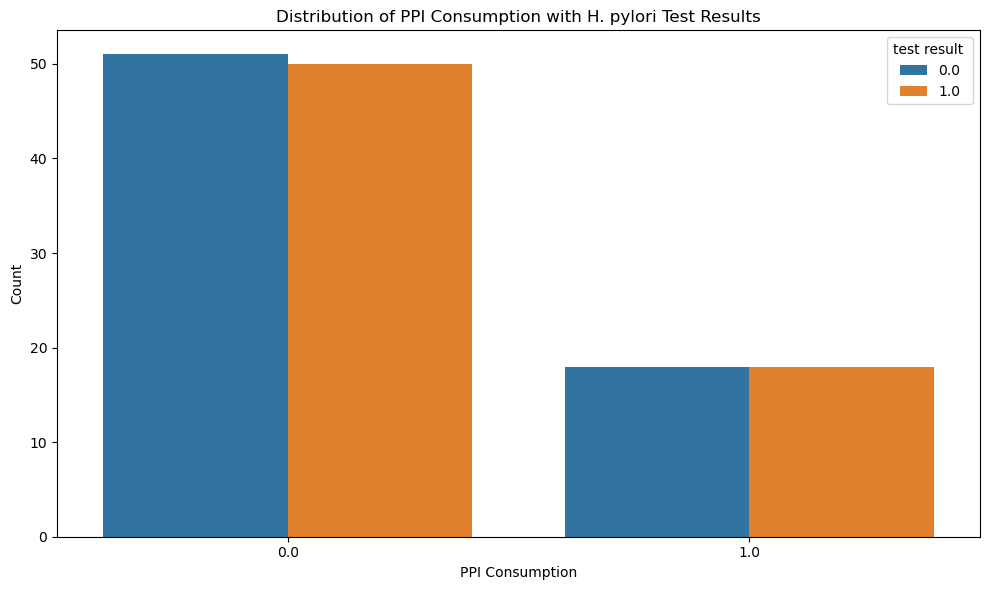

In [35]:
# PPI consumption distribution with H. pylori test results
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=' ppi taking', hue='test result ')
plt.title('Distribution of PPI Consumption with H. pylori Test Results')
plt.xlabel('PPI Consumption')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


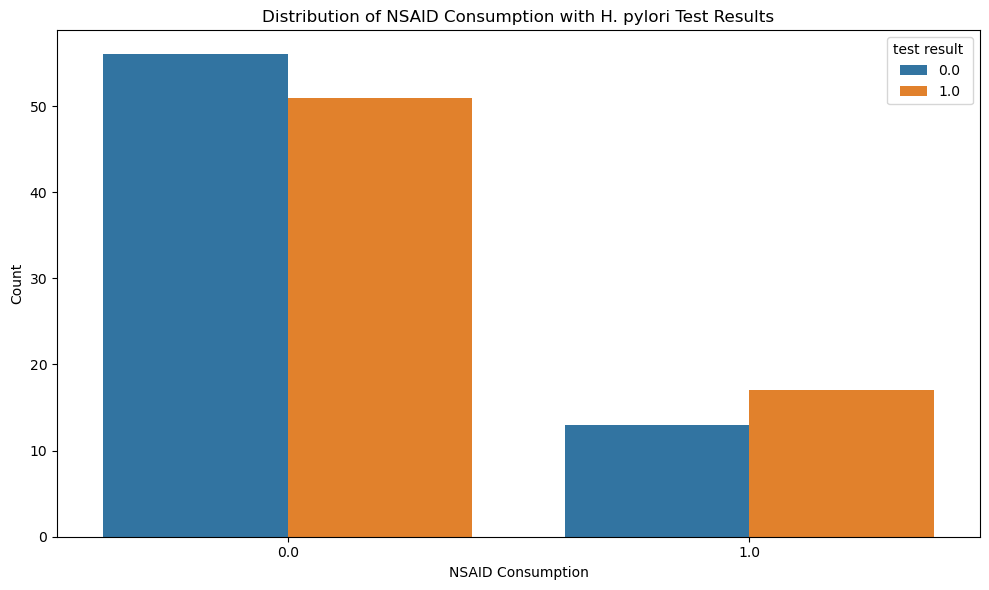

In [36]:
# NSAID consumption distribution with H. pylori test results
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=' nsaid taking', hue='test result ')
plt.title('Distribution of NSAID Consumption with H. pylori Test Results')
plt.xlabel('NSAID Consumption')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


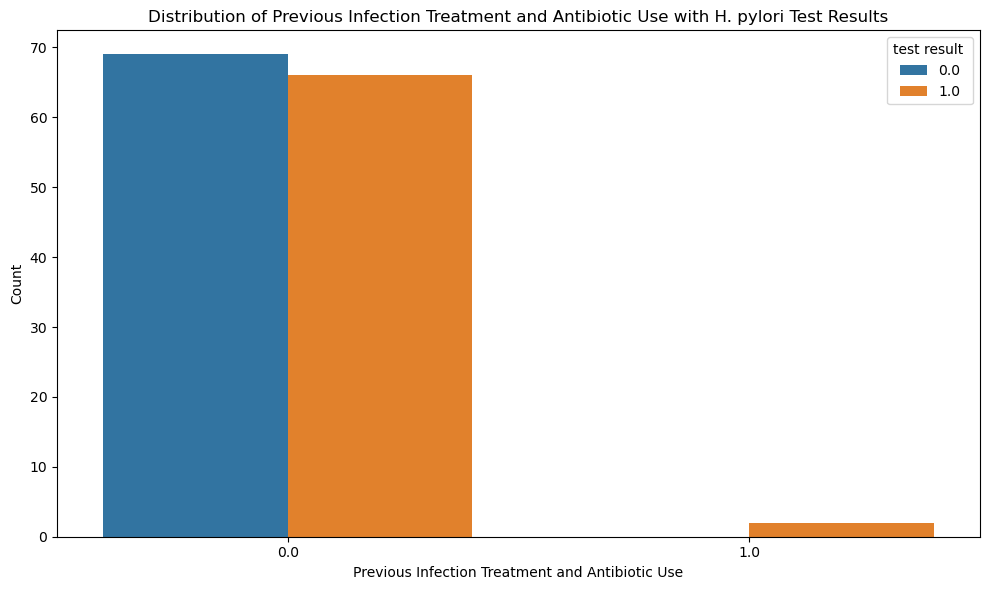

In [37]:
# Previous infection treatment and antibiotic use distribution with H. pylori test results
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Treatment of previous infection and use of antibiotics', hue='test result ')
plt.title('Distribution of Previous Infection Treatment and Antibiotic Use with H. pylori Test Results')
plt.xlabel('Previous Infection Treatment and Antibiotic Use')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


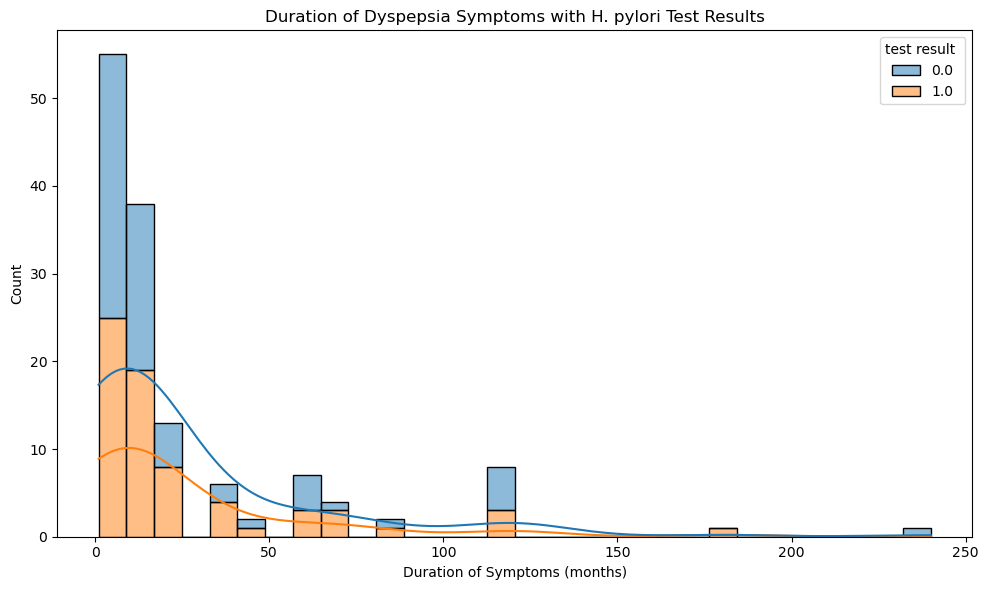

In [38]:
# Duration of symptoms distribution with H. pylori test results
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='months', hue='test result ', multiple='stack', kde=True)
plt.title('Duration of Dyspepsia Symptoms with H. pylori Test Results')
plt.xlabel('Duration of Symptoms (months)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
